In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from IPython.display import Image

# 1 wiki4HE  - Data set information
This dataset was colected from faculty at the Universitat Oberta de Catalunya (UOC) and Universitat Pompeu Fabra (UPF) using a an online survey set to all professors (2,128) at end of 2012 but 913 classify at valid responses.

The dadaset contain a questionarie about the perception of professors about Wikipedia like a tool to other colaborators and studants


## 1.1 Attribute Information:

* AGE: numeric
* GENDER: 0=Male; 1=Female
* DOMAIN: 1=Arts & Humanities; 2=Sciences; 3=Health Sciences; 4=Engineering & Architecture; 5=Law & Politics
* PhD: 0=No; 1=Yes
* YEARSEXP (years of university teaching experience): numeric
* UNIVERSITY: 1=UOC; 2=UPF
* UOC_POSITION (academic position of UOC members): 1=Professor; 2=Associate; 3=Assistant; 4=Lecturer; 5=Instructor; 6=Adjunct
* OTHER (main job in another university for part-time members): 1=Yes; 2=No
* OTHER_POSITION (work as part-time in another university and UPF members): 1=Professor; 2=Associate; 3=Assistant; 4=Lecturer; 5=Instructor; 6=Adjunct
* USERWIKI (Wikipedia registered user): 0=No; 1=Yes

The following survey items are Likert scale (1-5) ranging from strongly disagree / never (1) to strongly agree / always (5)

**Perceived Usefulness**
* PU1: The use of Wikipedia makes it easier for students to develop new skills
* PU2: The use of Wikipedia improves students' learning
* PU3: Wikipedia is useful for teaching

**Perceived Ease of Use**
* PEU1: Wikipedia is user-friendly
* PEU2: It is easy to find in Wikipedia the information you seek
* PEU3: It is easy to add or edit information in Wikipedia

**Perceived Enjoyment**
* ENJ1: The use of Wikipedia stimulates curiosity
* ENJ2: The use of Wikipedia is entertaining

**Quality**
* QU1: Articles in Wikipedia are reliable
* QU2: Articles in Wikipedia are updated
* QU3: Articles in Wikipedia are comprehensive
* QU4: In my area of expertise, Wikipedia has a lower quality than other educational resources *(negative)*
* QU5: I trust in the editing system of Wikipedia

**Visibility**
* VIS1: Wikipedia improves visibility of students' work
* VIS2: It is easy to have a record of the contributions made in Wikipedia
* VIS3: I cite Wikipedia in my academic papers

**Social Image**
* IM1: The use of Wikipedia is well considered among colleagues
* IM2: In academia, sharing open educational resources is appreciated
* IM3: My colleagues use Wikipedia

**Sharing attitude**
* SA1: It is important to share academic content in open platforms
* SA2: It is important to publish research results in other media than academic journals or books
* SA3: It is important that students become familiar with online collaborative environments

**Use behaviour**
* USE1: I use Wikipedia to develop my teaching materials
* USE2: I use Wikipedia as a platform to develop educational activities with students
* USE3: I recommend my students to use Wikipedia
* USE4: I recommend my colleagues to use Wikipedia
* USE5: I agree my students use Wikipedia in my courses

**Profile 2.0**
* PF1: I contribute to blogs
* PF2: I actively participate in social networks
* PF3: I publish academic content in open platforms

**Job relevance**
* JR1: My university promotes the use of open collaborative environments in the Internet
* JR2: My university considers the use of open collaborative environments in the Internet as a teaching merit

**Behavioral intention**
* BI1: In the future I will recommend the use of Wikipedia to my colleagues and students
* BI2: In the future I will use Wikipedia in my teaching activity

**Incentives**
* INC1: To design educational activities using Wikipedia, it would be helpful: a best practices guide
* INC2: To design educational activities using Wikipedia, it would be helpful: getting instruction from a colleague
* INC3: To design educational activities using Wikipedia, it would be helpful: getting specific training
* INC4: To design educational activities using Wikipedia, it would be helpfull: greater institutional recognition

**Experience**
* EXP1: I consult Wikipedia for issues related to my field of expertise
* EXP2: I consult Wikipedia for other academic related issues
* EXP3: I consult Wikipedia for personal issues
* EXP4: I contribute to Wikipedia (editions, revisions, articles improvement...)
* EXP5: I use wikis to work with my students

## 1.2 Loading data

Load data and create references dictionaries

In [2]:
# Loading dataset
wiki_df = pd.read_csv('data/wiki4HE.csv', delimiter=';')
# set all columns to upper case
wiki_df.columns = map(str.upper, wiki_df.columns)

# separate features
f_person = ['AGE', 'GENDER', 'DOMAIN', 'PHD', 'YEARSEXP', 'UNIVERSITY', 'UOC_POSITION', 'OTHER_POSITION', 'OTHERSTATUS', 'USERWIKI']
f_questions = wiki_df.columns.difference(f_person)
# describe data col
describe_c = {
'PU1': ['Perceived Usefulness','The use of Wikipedia makes it easier for students to develop new skills'],
'PU2': ['Perceived Usefulness','The use of Wikipedia improves students learning'],
'PU3': ['Perceived Usefulness','Wikipedia is useful for teaching'],

'PEU1': ['Perceived Ease of Use','Wikipedia is user-friendly'],
'PEU2': ['Perceived Ease of Use','It is easy to find in Wikipedia the information you seek'],
'PEU3': ['Perceived Ease of Use','It is easy to add or edit information in Wikipedia'],

'ENJ1': ['Perceived Enjoyment','The use of Wikipedia stimulates curiosity'],
'ENJ2': ['Perceived Enjoyment','The use of Wikipedia is entertaining'],

'QU1': ['Quality','Articles in Wikipedia are reliable'],
'QU2': ['Quality','Articles in Wikipedia are updated'],
'QU3': ['Quality','Articles in Wikipedia are comprehensive'],
'QU4': ['Quality','In my area of expertise, Wikipedia has a lower quality than other'],
'QU5': ['Quality','I trust in the editing system of Wikipedia'],

'VIS1': ['Visibility','Wikipedia improves visibility of students work'],
'VIS2': ['Visibility','It is easy to have a record of the contributions made in Wikipedia'],
'VIS3': ['Visibility','I cite Wikipedia in my academic papers'],

'IM1': ['Social Image','The use of Wikipedia is well considered among colleagues'],
'IM2': ['Social Image','In academia, sharing open educational resources is appreciated'],
'IM3': ['Social Image','My colleagues use Wikipedia'],

'SA1': ['Sharing attitude','It is important to share academic content in open platforms'],
'SA2': ['Sharing attitude','It is important to publish research results in other media'],
'SA3': ['Sharing attitude','It is important that students become familiar with online collab. env.'],

'USE1': ['Use behaviour','I use Wikipedia to develop my teaching materials'],
'USE2': ['Use behaviour','I use Wikipedia as a platform to develop educational activities with students'],
'USE3': ['Use behaviour','I recommend my students to use Wikipedia'],
'USE4': ['Use behaviour','I recommend my colleagues to use Wikipedia'],
'USE5': ['Use behaviour','I agree my students use Wikipedia in my courses'],

'PF1': ['Profile 2.0','I contribute to blogs'],
'PF2': ['Profile 2.0','I actively participate in social networks'],
'PF3': ['Profile 2.0','I publish academic content in open platforms'],

'JR1': ['Job relevance','My university promotes the use of open collab. environments in the Internet'],
'JR2': ['Job relevance','My univ. considers the use of open collab. environments as a teaching merit'],

'BI1': ['Behavioral intention','In the future I will recommend the use of Wiki to my colleagues and students'],
'BI2': ['Behavioral intention','In the future I will use Wikipedia in my teaching activity'],

'INC1': ['Incentives','To design educational activ. using Wiki: a best practices guide'],
'INC2': ['Incentives','To design educational activ. using Wiki: getting instruction from a colleague'],
'INC3': ['Incentives','To design educational activ. using Wiki: getting specific training'],
'INC4': ['Incentives','To design educational acti. using Wiki: greater institutional recognition'],

'EXP1': ['Experience', 'I consult Wikipedia for issues related to my field of expertise'],
'EXP2': ['Experience', 'I consult Wikipedia for other academic related issues'],
'EXP3': ['Experience', 'I consult Wikipedia for personal issues'],
'EXP4': ['Experience', 'I contribute to Wikipedia (editions, revisions, articles improvement...)'],
'EXP5': ['Experience', 'I use wikis to work with my students']}

# dictionary of categorical features
dict_cat = {'GENDER': {0:'Male', 1:'Female'}, 
            'DOMAIN': {'1':'Arts & Humanities', '2':'Sciences', '3':'Health Sciences', '4':'Engineering & Architecture', '5':'Law & Politics', '6':'Other'}, 
            'PHD': {0:'No', 1:'Yes'}, 
            'UNIVERSITY': {1: 'UOC', 2:'UPF'}, 
            'UOC_POSITION': {'1':'Professor', '2':'Associate', '3':'Assistant', '4':'Lecturer', '5':'Instructor', '6':'Adjunct'}, 
            'OTHER_POSITION': {'1':'Yes', '2':'No'}, 
            'OTHERSTATUS':{'1':'Professor', '2':'Associate', '3':'Assistant', '4':'Lecturer', '5':'Instructor', '6':'Adjunct', '7':'Other'}, 
            'USERWIKI': {0:'No', 1:'Yes'}}

# list of prexix ask group
list_groups = ['PU', 'PEU', 'ENJ', 'QU', 'VIS', 'IM', 'SA', 'USE', 'PF', 'JR', 'BI', 'INC', 'EXP']

# 2 Missing Data
## 2.1 Amount and percentage of lost data

In [3]:
def get_describe_c(l , complete=False):
    """
    Function to get description of questions used in map function
    
    Attributes:
        l (str): column name
        complete (bool): if retorn complete string or just question definition
        
    Returns:
        (str) or a (list) of strings description
    """
    if complete:
        return describe_c.get(l, '')
    else:
        return describe_c.get(l, ['',''])[1]


# verify the missing data and quantify
missing = pd.DataFrame({'qtd_?_data':wiki_df.isin(['?']).sum(), 
                        'perc_?_data':round((wiki_df.isin(['?']).sum()*100/wiki_df.shape[0]), 2),
                        'col_descr': map(get_describe_c, wiki_df.columns)
                       })
missing

,qtd_?_data,perc_?_data,col_descr
AGE,0,0.00,
GENDER,0,0.00,
DOMAIN,2,0.22,
PHD,0,0.00,
YEARSEXP,23,2.52,
UNIVERSITY,0,0.00,
UOC_POSITION,113,12.38,
OTHER_POSITION,261,28.59,
OTHERSTATUS,540,59.15,
USERWIKI,4,0.44,


## 2.1 Cleaning Data

To the personal profile replace '?' value to nan and to questionnaires replace to 0

In [4]:
# set nan to personal features and 0 to questionary
p_temp = wiki_df[f_person].replace('?', np.nan)
q_temp = wiki_df[f_questions].replace('?', 0)
# change type column of questionary
for col in q_temp.columns:
    q_temp[col] = q_temp[col].astype(int)
wiki_df = pd.concat([p_temp, q_temp], axis=1)
# delete temp dataframes
del p_temp
del q_temp

# if USERWIKI is nan turn to 0
wiki_df['USERWIKI'][wiki_df['USERWIKI'].isna()] = 0
wiki_df['USERWIKI'][wiki_df['USERWIKI'] == '0'] = 0
# convert YEARSEXP to numerical
wiki_df['YEARSEXP'] = pd.to_numeric(wiki_df['YEARSEXP']).copy()
# convert PHD and USERWIKI to bool
wiki_df['PHD'] = wiki_df['PHD'].astype('bool')
wiki_df['USERWIKI'] = wiki_df['USERWIKI'].astype('bool')

## 2.2 Totaling some data
Totalize mean and std of Likert scale by question group and geral questionnaire

In [5]:
# Let's take mean and std of each theme question
for g in list_groups:
    feats = [i for i in wiki_df.columns if (i.startswith(g) and i != 'USERWIKI')]
    title = describe_c[feats[0]][0]
    col_name_mean = 'G_{}_MEAN'.format(g)
    col_name_std = 'G_{}_STD'.format(g)

    wiki_df[col_name_mean] = wiki_df[feats].mean(axis = 1)
    wiki_df[col_name_std] = wiki_df[feats].std(axis = 1)
    
# Let's take mean and std of all attributes
feats = f_questions
title = describe_c[feats[0]][0]
col_name_mean = 'TOTAL_RATE_MEAN'
col_name_std = 'TOTAL_RATE_STD'

# add geral mean and std to dataframe
wiki_df[col_name_mean] = wiki_df[feats].mean(axis = 1)
wiki_df[col_name_std] = wiki_df[feats].std(axis = 1)

In [6]:
wiki_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AGE              913 non-null    int64  
 1   GENDER           913 non-null    int64  
 2   DOMAIN           911 non-null    object 
 3   PHD              913 non-null    bool   
 4   YEARSEXP         890 non-null    float64
 5   UNIVERSITY       913 non-null    int64  
 6   UOC_POSITION     800 non-null    object 
 7   OTHER_POSITION   652 non-null    object 
 8   OTHERSTATUS      373 non-null    object 
 9   USERWIKI         913 non-null    bool   
 10  BI1              913 non-null    int64  
 11  BI2              913 non-null    int64  
 12  ENJ1             913 non-null    int64  
 13  ENJ2             913 non-null    int64  
 14  EXP1             913 non-null    int64  
 15  EXP2             913 non-null    int64  
 16  EXP3             913 non-null    int64  
 17  EXP4            

In [7]:
wiki_df.head()

,AGE,GENDER,DOMAIN,PHD,YEARSEXP,UNIVERSITY,UOC_POSITION,OTHER_POSITION,OTHERSTATUS,USERWIKI,...,G_JR_MEAN,G_JR_STD,G_BI_MEAN,G_BI_STD,G_INC_MEAN,G_INC_STD,G_EXP_MEAN,G_EXP_STD,TOTAL_RATE_MEAN,TOTAL_RATE_STD
0,40,0,2,True,14.0,1,2,NaN,NaN,False,...,2.5,2.121320,2.5,0.707107,5.00,0.00000,3.0,1.414214,3.093023,1.305920
1,42,0,5,True,18.0,1,2,NaN,NaN,False,...,3.5,0.707107,2.0,0.000000,3.75,0.50000,2.8,1.095445,2.697674,1.124084
2,37,0,4,True,13.0,1,3,NaN,NaN,False,...,3.5,0.707107,1.0,0.000000,4.50,1.00000,2.0,0.707107,2.651163,1.212705
3,40,0,4,False,13.0,1,3,NaN,NaN,False,...,4.5,0.707107,3.0,0.000000,3.50,0.57735,3.6,0.547723,3.441860,0.733625
4,51,0,6,False,8.0,1,3,NaN,NaN,True,...,3.0,0.000000,5.0,0.000000,4.50,0.57735,4.6,0.547723,4.186047,0.852331


In [8]:
wiki_df.describe()

,AGE,GENDER,YEARSEXP,UNIVERSITY,BI1,BI2,ENJ1,ENJ2,EXP1,EXP2,...,G_JR_MEAN,G_JR_STD,G_BI_MEAN,G_BI_STD,G_INC_MEAN,G_INC_STD,G_EXP_MEAN,G_EXP_STD,TOTAL_RATE_MEAN,TOTAL_RATE_STD
count,913.000000,913.000000,890.000000,913.000000,913.00000,913.000000,913.000000,913.000000,913.000000,913.000000,...,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000
mean,42.246440,0.424973,10.874157,1.123768,2.84885,2.848850,3.765608,3.750274,2.958379,3.450164,...,3.258488,0.570023,2.848850,0.226150,3.390745,0.637847,2.804600,1.171204,3.071168,1.171862
std,8.058418,0.494610,7.451222,0.329497,1.17687,1.258803,1.020535,1.019042,1.230291,1.169787,...,1.174004,0.739949,1.165401,0.449544,1.106903,0.566289,0.821918,0.494953,0.572002,0.289542
min,23.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.930233,0.000000
25%,36.000000,0.000000,5.000000,1.000000,2.00000,2.000000,3.000000,3.000000,2.000000,3.000000,...,2.500000,0.000000,2.000000,0.000000,3.000000,0.000000,2.200000,0.894427,2.697674,0.988864
50%,42.000000,0.000000,10.000000,1.000000,3.00000,3.000000,4.000000,4.000000,3.000000,4.000000,...,3.500000,0.000000,3.000000,0.000000,3.500000,0.500000,2.800000,1.224745,3.046512,1.165677
75%,47.000000,1.000000,15.000000,1.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,0.707107,4.000000,0.707107,4.000000,0.957427,3.400000,1.516575,3.441860,1.349706
max,69.000000,1.000000,43.000000,2.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,3.535534,5.000000,3.535534,5.000000,2.500000,5.000000,2.345208,5.000000,2.228627


# 3 Analysing the data

## 3.1 Profile of faculty members by feature

Let's check the profile of the faculty members of this data

In [9]:
def str_cat(field):
    """
    Function return a list of real values of categorical fields
    
    Attributes:
        field (str): column name
        
    Returns:
        (list)(int): list of categorical descriptions
    """
    temp = map(lambda x: dict_cat[field][x], wiki_df[field])    
    return list(temp)

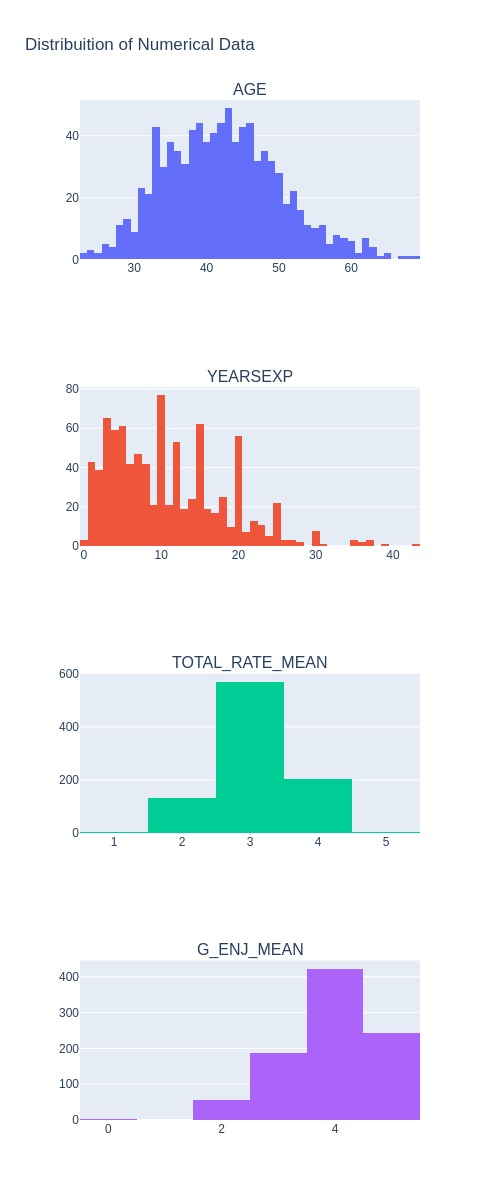

In [10]:
# list of numerical features
feats = ['AGE', 'YEARSEXP', 'TOTAL_RATE_MEAN', 'G_ENJ_MEAN']
# parameters
cols = 1

# create a subplot
fig = make_subplots(rows=int(np.ceil(len(feats)/cols)),
                    cols=cols,
                    subplot_titles=feats)
fig.update_layout(title='Distribuition of Numerical Data', height=1200, width=500)

# for each feature
for enu, f in enumerate(feats):
    # calculate subplot position
    row=int(np.ceil((enu+1)/cols))
    col=(enu % cols)+1
    
    temp_fig = px.histogram(wiki_df, 
                            x=f,
                            nbins=80,
                            color_discrete_sequence=[enu]
                           )
    # add each data at subplot
    for t_data in temp_fig['data']:
        fig.append_trace(t_data, row, col)
    
# to be viewed on github
Image(fig.to_image("jpg"))

# to normal plot
# fig.show()    

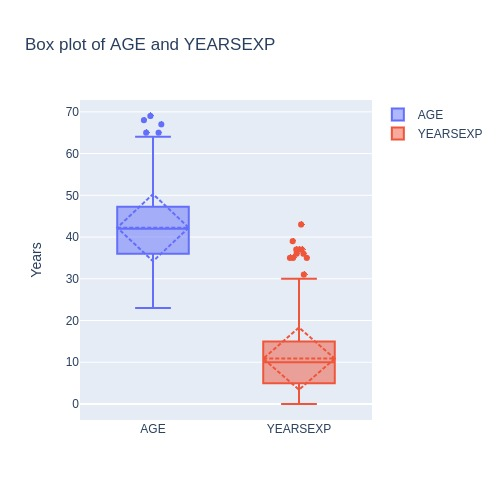

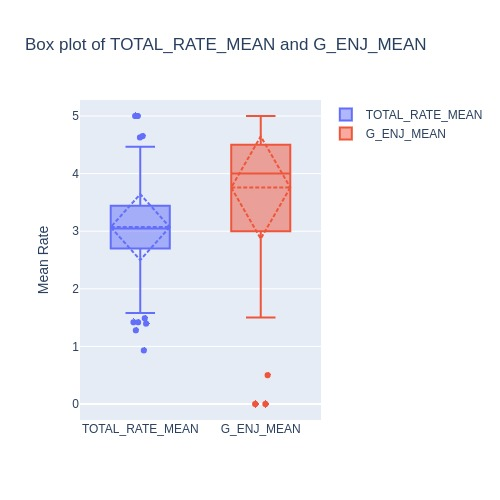

In [11]:
# list of numerical features
feats = [['AGE', 'YEARSEXP', 'Years'], ['TOTAL_RATE_MEAN', 'G_ENJ_MEAN', 'Mean Rate']]

# for each feature
for t_feats in feats:
    # create a subplot
    fig = go.Figure()
    # for each feature
    for enu, f in enumerate(t_feats[:2]): 
        temp_fig = go.Box(y=wiki_df[f],
                          name=f,
                          boxmean='sd',
                          boxpoints='outliers',
                          jitter=0.3,
                         )
        fig.add_trace(temp_fig)
    
    # update layout
    fig.update_layout(title = 'Box plot of {} and {}'.format(*t_feats[0:2]), height=500, width=500)
    fig.update_yaxes(title = t_feats[2])

    # to be viewed on github
    display(Image(fig.to_image("jpg")))

    # to normal plot
    #fig.show()    

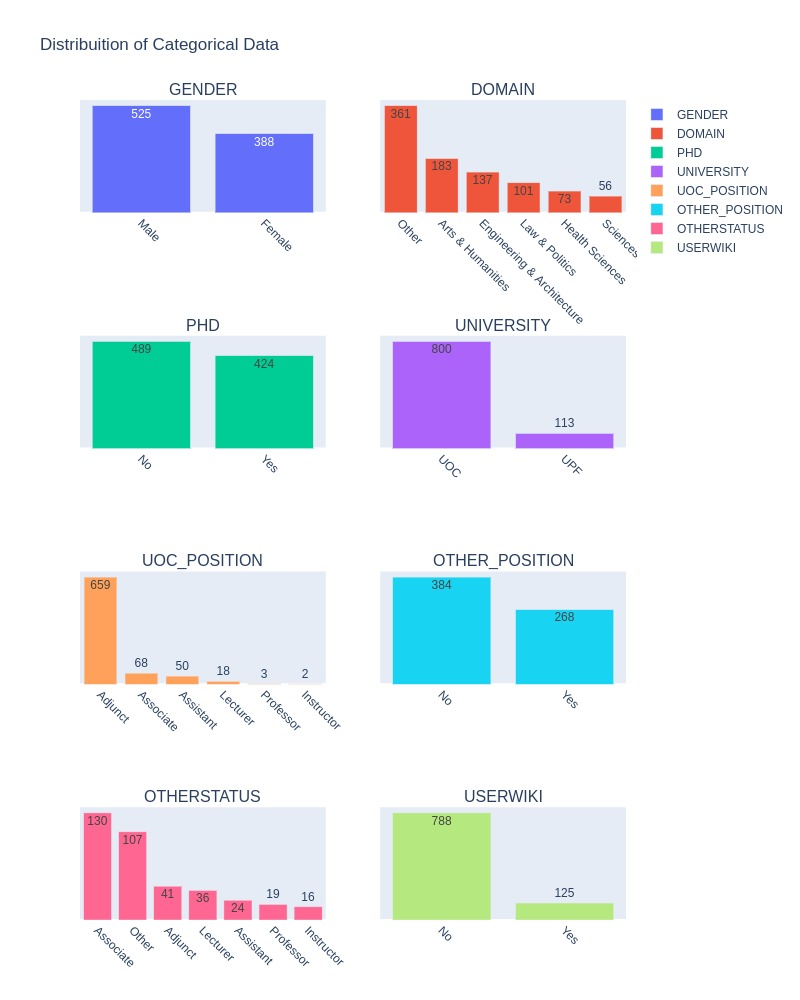

In [12]:
# list of numerical features
feats = ['GENDER', 'DOMAIN', 'PHD', 'UNIVERSITY', 'UOC_POSITION', 'OTHER_POSITION', 'OTHERSTATUS', 'USERWIKI']
# parameters
cols = 2

# create a subplot
fig = make_subplots(rows=int(np.ceil(len(feats)/cols)),
                    cols=cols,
                    vertical_spacing=0.15,
                    subplot_titles=feats)
fig.update_layout(title='Distribuition of Categorical Data', height=1000, width=800)

# for each feature
for enu, f in enumerate(feats):
    # total values
    status_values = wiki_df[f].value_counts().to_frame()
    
    # calculate subplot position
    row=int(np.ceil((enu+1)/cols))
    col=(enu % cols)+1
    temp_fig = go.Bar(x=list(map(lambda x: dict_cat[f][x], status_values.index)),
                      y=status_values[f],
                      name = f,
                      text=status_values[f],
                      textposition='auto'
                      )
    # add trace to subplot
    fig.append_trace(temp_fig, row, col)
    # update layout
    fig.update_yaxes(showgrid = False,showticklabels = False)
    fig.update_xaxes(tickangle = 45)
    
# to be viewed on github
Image(fig.to_image("jpg"))

# to normal plot
#fig.show()    

In [13]:
def plt_question_group(feats, cols, title, img=False):
    """
    Function to print grouped questionary
    
    Attributes:
        feats (list): list of features to print
        cols  (int): number of columns
        title (str): title of geral subplot
        img  (bool): display a jpg image
    """    
    
    rows = int(np.ceil(len(feats)/cols)) 
    
    # create a subplot
    fig = make_subplots(rows=rows,
                        cols=cols,
                        subplot_titles=feats)
    fig.update_layout(title=title, height=300*rows, width=250*cols)

    # for each feature
    for enu, f in enumerate(feats):
        # total values
        status_values = wiki_df[f].value_counts().to_frame()

        # calculate subplot position
        row=int(np.ceil((enu+1)/cols))
        col=(enu % cols)+1
  
        temp_fig = go.Bar(x=status_values.index,
                          y=status_values[f],
                          name = describe_c[f][1],
                          text=status_values[f],
                          textposition='auto'
                          )

        fig.append_trace(temp_fig, row, col)
        fig.update_yaxes(showgrid = False,showticklabels = False)
        fig.update_xaxes(type = 'category', categoryorder = 'category ascending')
    
    # put legend on below
    if rows > 1:
        fig.update_layout(legend=dict(x=-.1, y=-0.35))
    else:
        fig.update_layout(legend=dict(x=-.1, y=-0.75))

    if img:
        # to be viewed on github
        display(Image(fig.to_image("jpg")))
    else:
        # to normal plot
        fig.show() 
        
        
def plt_question_stack(feats, title, wiki_df, img=False):
    """
    Function to print stacked bars
    
    Attributes:
        feats (list): list of features to print
        title (str): title of geral subplot
        img  (bool): display a jpg image
    """
    color_scale = ['indianred ', 'lightsalmon', 'snow' ,'powderblue', 'royalblue']
    rows = len(feats) 
    
    # create a plot
    fig = go.Figure()
 
    for likely in range(1,6):        
        # for each feature
        questions = []
        for enu, f in enumerate(feats):
            if len(wiki_df[wiki_df[f] == likely][f].value_counts()) > 0:
                questions.append(wiki_df[wiki_df[f] == likely][f].value_counts().values[0])
            else:
                questions.append(0)

        # calculate subplot position
        row=int(np.ceil((enu+1)/cols))
        col=(enu % cols)+1
        
        # create a bar
        temp_fig = go.Bar(x=questions,
                          y=['{} - {}'.format(describe_c[f][1], f) for f in feats],
                          name = str(likely),#describe_c[f][1],
                          text=questions,
                          textposition='auto',
                          orientation='h',
                          marker_color=color_scale[likely-1]
                          )

        fig.add_trace(temp_fig)
    
    # update size and stack mode
    fig.update_layout(title=title, barmode='stack', height=30*rows, width=900)
               
    if img:
        # to be viewed on github
        display(Image(fig.to_image("jpg")))
    else:
        # to normal plot
        fig.show() 

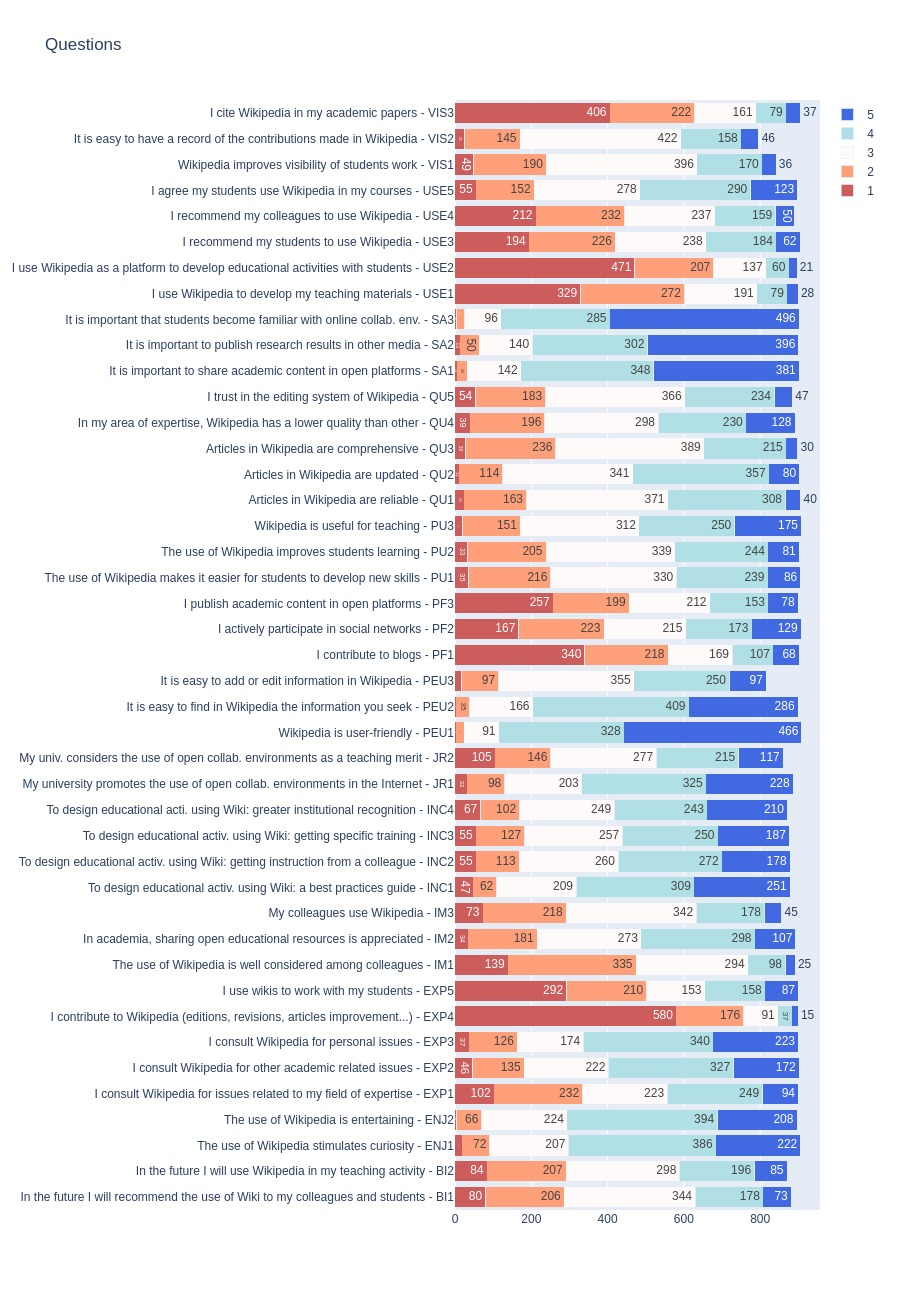

In [14]:
feats = f_questions # take all question features
title = 'Questions' # set title
plt_question_stack(feats, title, wiki_df, True) # printthe stack graph

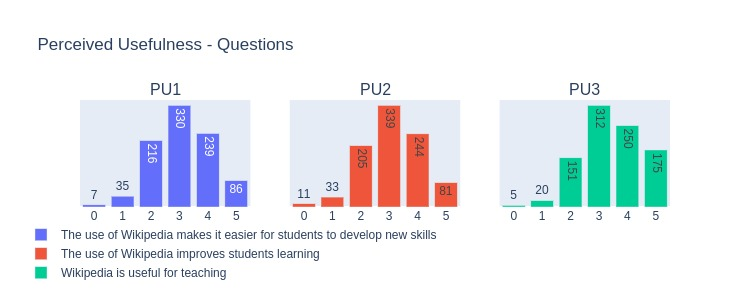

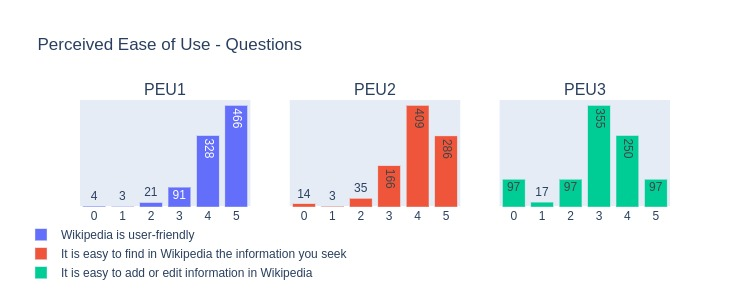

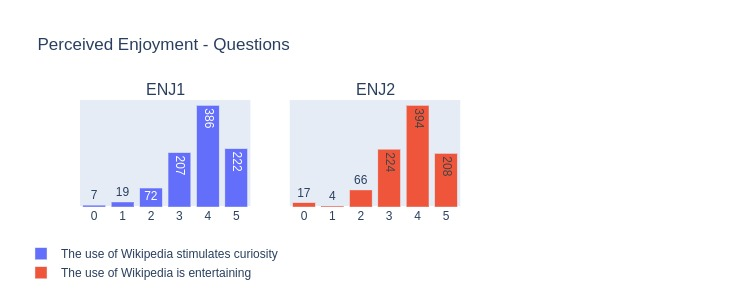

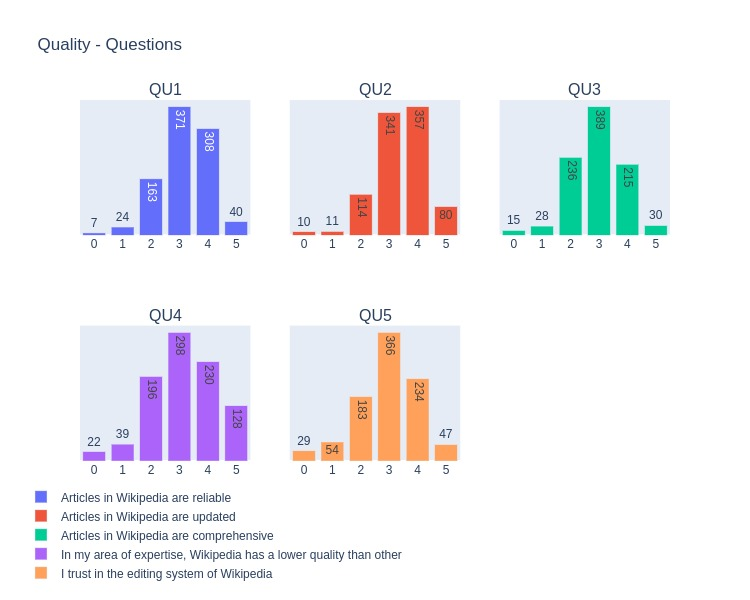

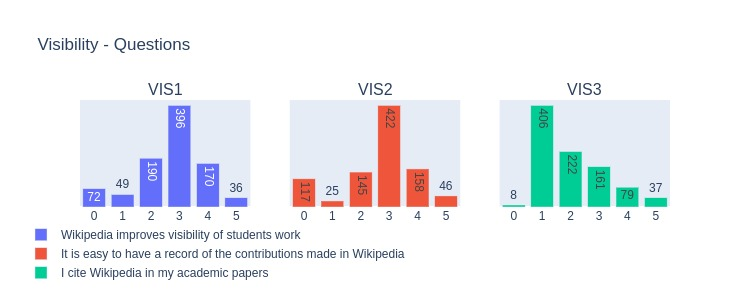

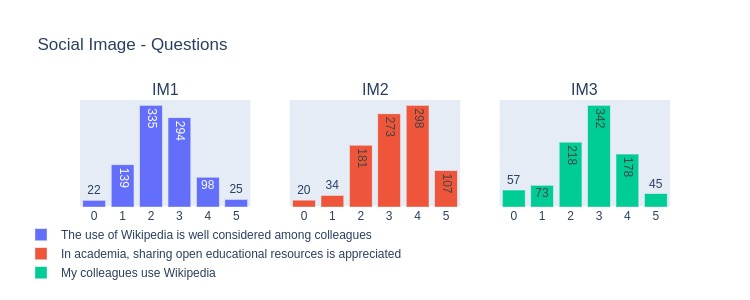

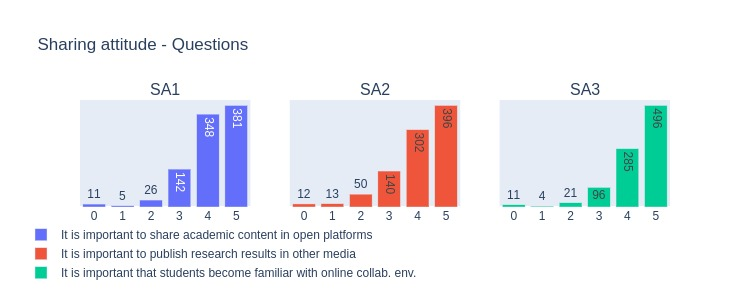

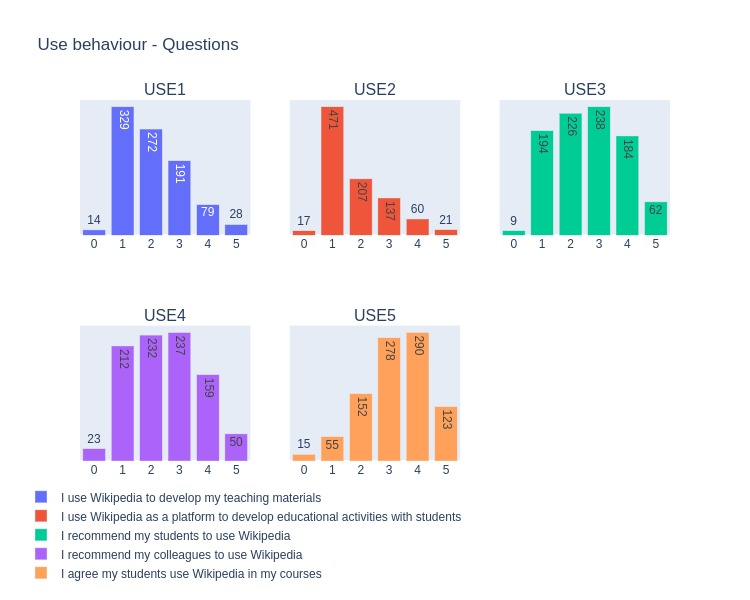

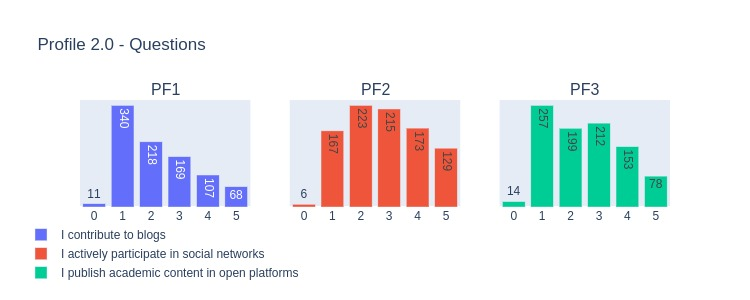

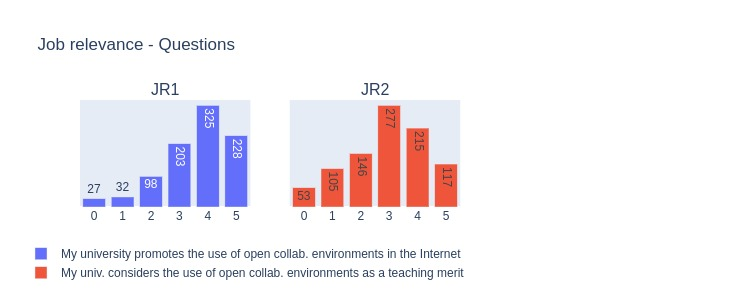

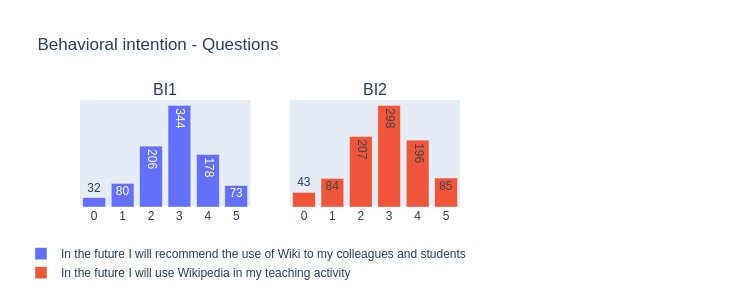

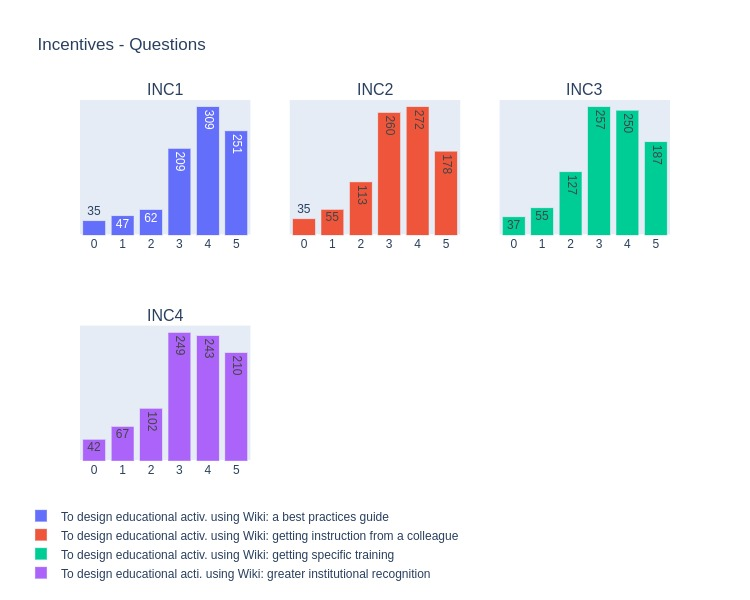

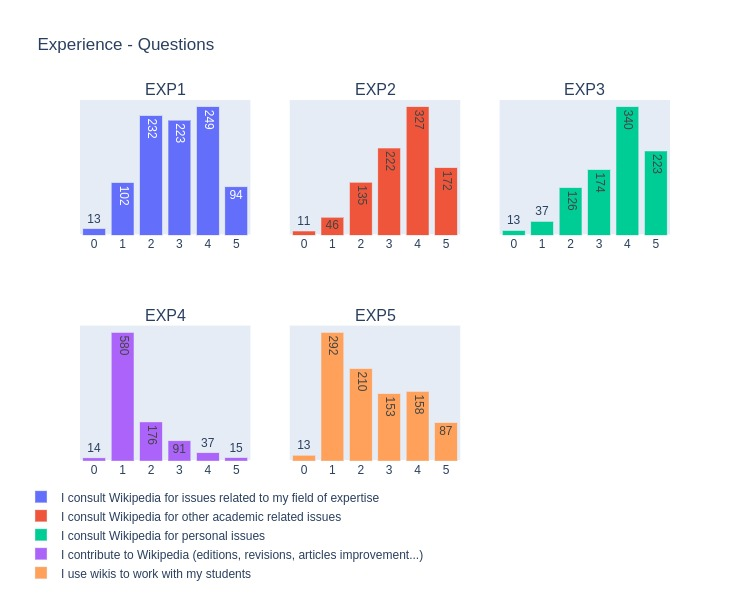

In [15]:
cols = 3 # number of columns
# for each group
for g in list_groups:
    # take features of each group
    feats = [i for i in wiki_df.columns if (i.startswith(g) and i != 'USERWIKI')]
    # make title with description
    title = describe_c[feats[0]][0] + ' - Questions'
    # plot graphs
    plt_question_group(feats, cols, title, True)

## 3.2 Gender analysis

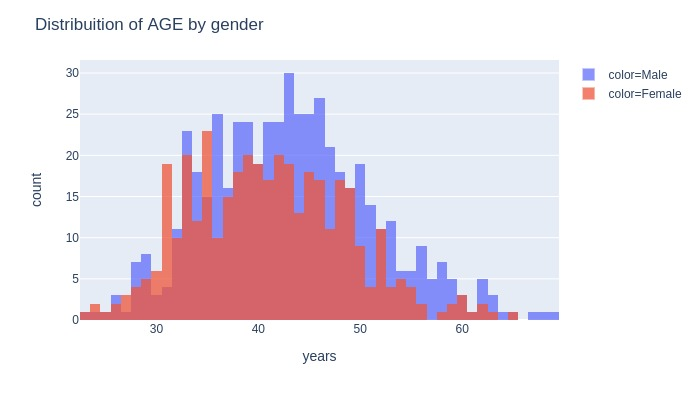

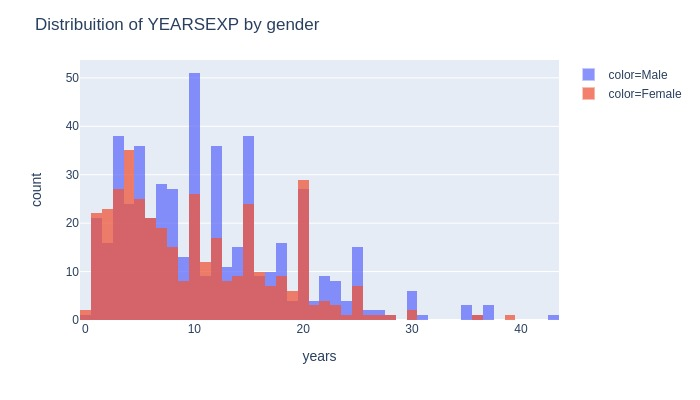

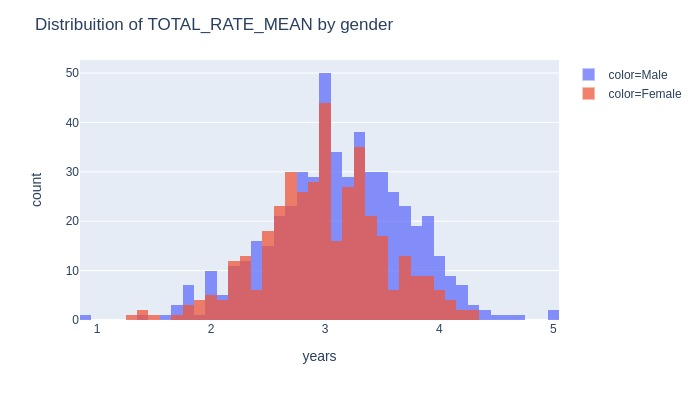

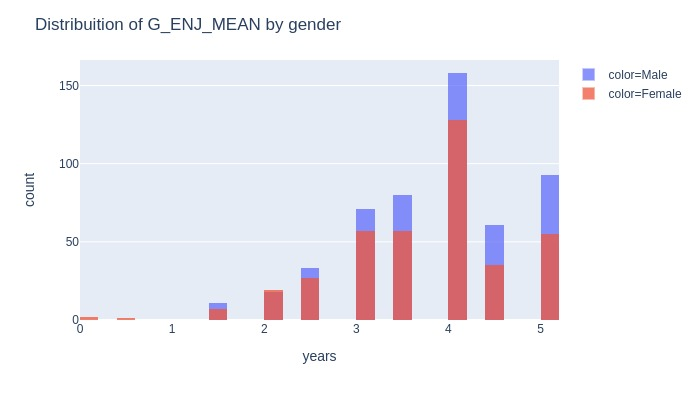

In [16]:
# list of numerical features
feats = ['AGE', 'YEARSEXP', 'TOTAL_RATE_MEAN', 'G_ENJ_MEAN']
# parameters
cols = 1

# for each feature
for enu, f in enumerate(feats):
    temp_fig = px.histogram(wiki_df, 
                            x=f,
                            nbins=50,
                            color=str_cat('GENDER'),
                            color_discrete_sequence=[enu],
                            labels={f:'years'}
                           )
        
    temp_fig.update_layout(title='Distribuition of {} by gender'.format(f), 
                           height=400, 
                           width=700,
                           barmode='overlay')
    temp_fig.update_traces(opacity=0.75)
    #temp_fig.show()
    
    # to be viewed on github
    display(Image(temp_fig.to_image("jpg")))

In [17]:
print(dict_cat['GENDER'])
wiki_df_male = wiki_df.groupby(['GENDER']).get_group(0)
wiki_df_female = wiki_df.groupby(['GENDER']).get_group(1)
print('Male')
display(wiki_df_male[feats].describe())
print('')
print('Female')
display(wiki_df_female[feats].describe())

{0: 'Male', 1: 'Female'}
Male


,AGE,YEARSEXP,TOTAL_RATE_MEAN,G_ENJ_MEAN
count,525.000000,511.000000,525.000000,525.000000
mean,43.123810,11.461840,3.132049,3.808571
std,8.189426,7.636985,0.593564,0.868239
min,23.000000,0.000000,0.930233,1.500000
25%,37.000000,5.000000,2.767442,3.000000
50%,43.000000,10.000000,3.139535,4.000000
75%,48.000000,15.000000,3.534884,4.500000
max,69.000000,43.000000,5.000000,5.000000



Female


,AGE,YEARSEXP,TOTAL_RATE_MEAN,G_ENJ_MEAN
count,388.000000,379.000000,388.000000,388.000000
mean,41.059278,10.081794,2.988792,3.689433
std,7.730880,7.126681,0.531197,0.912626
min,23.000000,0.000000,1.279070,0.000000
25%,35.000000,4.000000,2.651163,3.000000
50%,41.000000,9.000000,3.000000,4.000000
75%,46.000000,15.000000,3.325581,4.000000
max,65.000000,39.000000,4.325581,5.000000


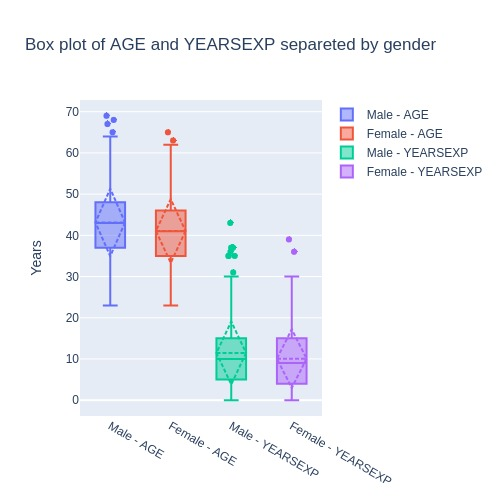

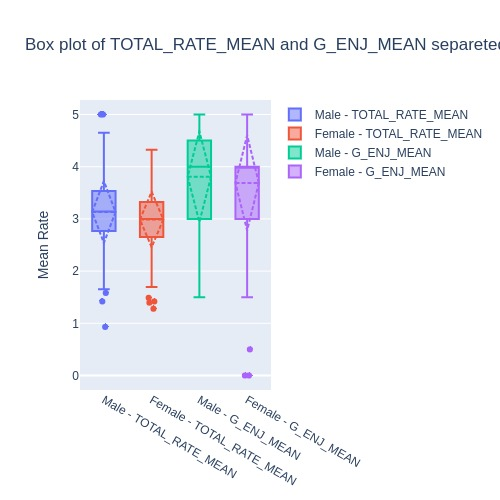

In [18]:
# list of numerical features
feats =  [['AGE', 'YEARSEXP', 'Years'], ['TOTAL_RATE_MEAN', 'G_ENJ_MEAN', 'Mean Rate']]
# parameters
cols = 1

for t_feats in feats:
    fig = go.Figure()
    for enu, f in enumerate(t_feats[:2]): 
        for data, gen in [[wiki_df_male, 'Male'], [wiki_df_female, 'Female']]:    
            # for each feature
            temp_fig = go.Box(y=data[f],
                              name=gen +' - '+ f,
                              boxmean='sd',
                              boxpoints='outliers',
                              jitter=0.3,
                             )
            fig.add_trace(temp_fig)

    fig.update_layout(title = 'Box plot of {} and {} separeted by gender'.format(*t_feats[:2]), height=500, width=500)
    fig.update_yaxes(title = t_feats[2])

    # to be viewed on github
    display(Image(fig.to_image("jpg")))

    # to normal plot
    #fig.show()   

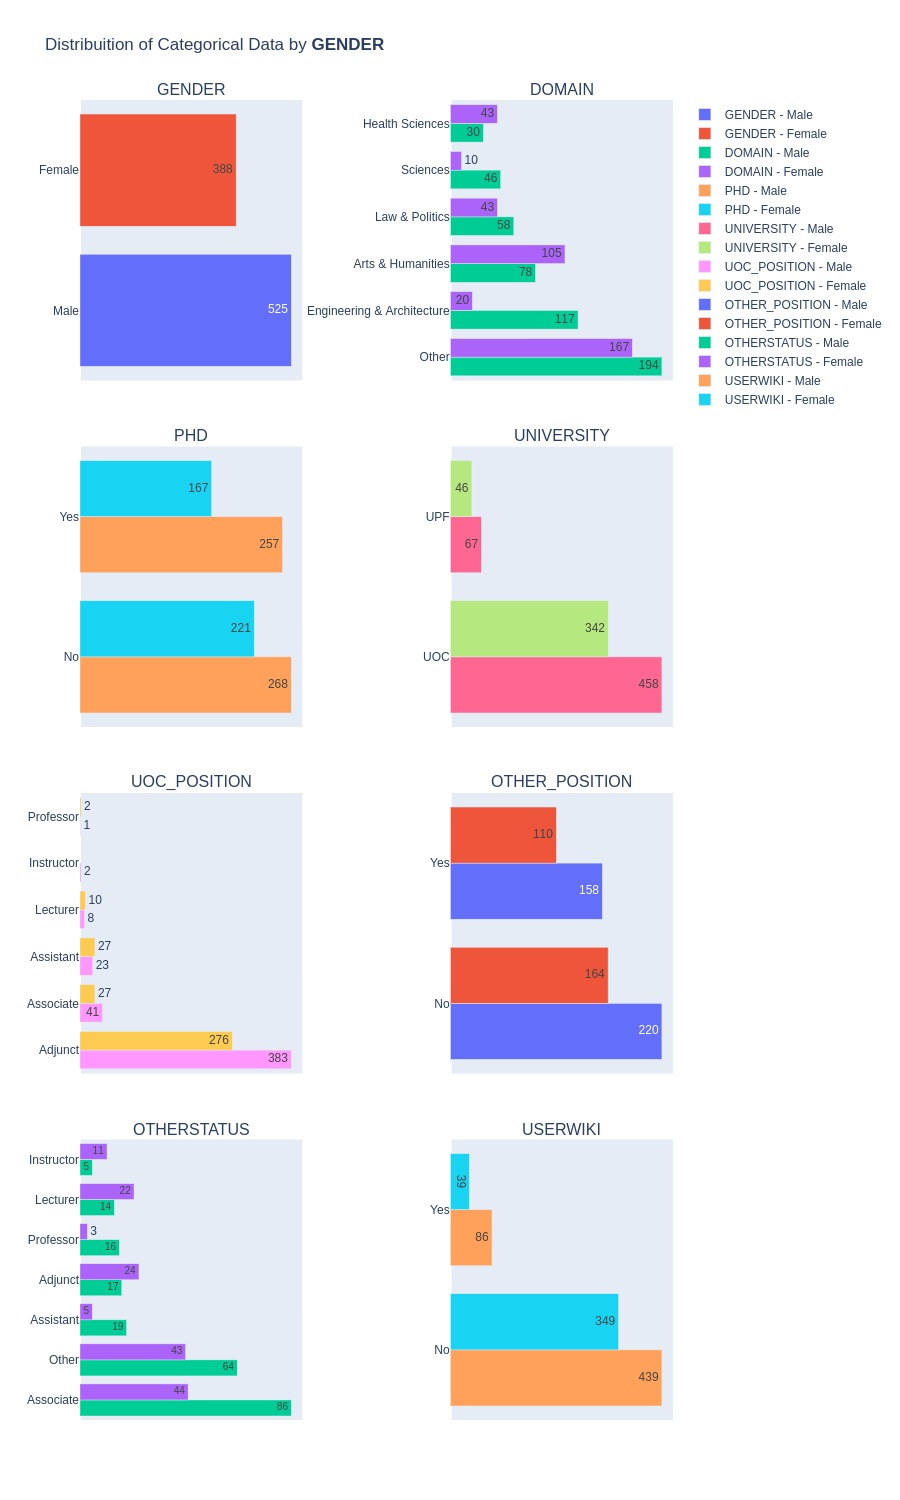

In [19]:
# list of numerical features
feats = ['GENDER', 'DOMAIN', 'PHD', 'UNIVERSITY', 'UOC_POSITION', 'OTHER_POSITION', 'OTHERSTATUS', 'USERWIKI']
# parameters
cols = 2

# create a subplot
fig = make_subplots(rows=int(np.ceil(len(feats)/cols)),
                    cols=cols,
                    vertical_spacing=0.05,
                    horizontal_spacing=0.25,
                    subplot_titles=feats)
fig.update_layout(title='Distribuition of Categorical Data by <b>GENDER</b>', height=1500, width=900)

# for each feature
for enu, f in enumerate(feats):
    for data, gen in [[wiki_df_male, 'Male'], [wiki_df_female, 'Female']]:    
        # total values
        status_values = data[f].value_counts().to_frame()

        # calculate subplot position
        row=int(np.ceil((enu+1)/cols))
        col=(enu % cols)+1
        temp_fig = go.Bar(y=list(map(lambda x: dict_cat[f][x], status_values.index)),
                          x=status_values[f],
                          orientation='h',
                          name = f+' - ' + gen,
                          text=status_values[f],
                          textposition='auto'
                          )

        fig.append_trace(temp_fig, row, col)
        fig.update_xaxes(showgrid = False,showticklabels = False)
    
# to be viewed on github
Image(fig.to_image("jpg"))

# to normal plot
#fig.show()    

## 3.3 Perceived Enjoyment Analysis

In [20]:
def years_histo_by_f(an_field):
    """
    Plot histogram of age and yearsexp by a field of questions
    
    Attributes:        
        an_field (str): feature to plot
    """
    
    # list of numerical features
    feats = ['AGE', 'YEARSEXP']
    # parameters
    cols = 1

    # create a subplot
    fig = make_subplots(rows=int(np.ceil(len(feats)/cols)),
                        cols=cols,
                        subplot_titles=feats)
    fig.update_layout(title='Distribuition of Numerical Data by {}'.format(an_field), height=700, width=700)

    # for each feature
    for enu, f in enumerate(feats):
        temp_fig = px.histogram(wiki_df[wiki_df[an_field] != 0].sort_values([an_field]), 
                                x=f,
                                nbins=15,
                                color=wiki_df[wiki_df[an_field] != 0].sort_values([an_field])[an_field],

                                labels={f:'years'}
                               )

        temp_fig.update_layout(title='Distribuition of {} by {}'.format(f, an_field), height=400, width=700)
        temp_fig.update_layout(barmode='group')

        #temp_fig.show()

        # to be viewed on github
        display(Image(temp_fig.to_image("jpg")))
        
def years_box_by_f(an_field):
    """
    Plot boxplot of age and yearsexp by a field of questions
    
    Attributes:        
        an_field (str): feature to plot
    """
    # list of numerical features
    feats =  [['AGE', 'YEARSEXP', 'Years']]
    # parameters
    cols = 1

    for t_feats in feats:
        fig = go.Figure()
        for enu, f in enumerate(t_feats[:2]): 

            for k in wiki_enj.groups.keys():
                if k != 0:
                    data = wiki_enj.get_group(k)    
                    # for each feature
                    temp_fig = go.Box(y=data[f],
                                      name= '{} - {}'.format(k, f),
                                      boxmean='sd',
                                      boxpoints='outliers',
                                      jitter=0.3,
                                     )
                    fig.add_trace(temp_fig)

        fig.update_layout(title = 'Box plot of {} and {} separeted by {}'.format(*t_feats[:2], an_field), height=500, width=500)
        fig.update_yaxes(title = t_feats[2])

        # to be viewed on github
        display(Image(fig.to_image("jpg")))

        # to normal plot
        #fig.show()  

def cat1_by_f(an_field):
    """
    Plot categorical features by a question
    List of features: 'GENDER', 'PHD', 'UNIVERSITY', 'OTHER_POSITION', 'USERWIKI
    
    Attributes:        
        an_field (str): feature to plot
    """
    # list of numerical features
    feats = ['GENDER', 'PHD', 'UNIVERSITY', 'OTHER_POSITION', 'USERWIKI']
    
    # for each feature
    for enu, f in enumerate(feats):
        fig = go.Figure()
        for k in wiki_enj.groups.keys():
            if k != 0:
                
                data = wiki_enj.get_group(k)  
                # total values
                status_values = data[f].value_counts().to_frame()

                # calculate subplot position
                row=int(np.ceil((enu+1)/cols))
                col=(enu % cols)+1
                temp_fig = go.Bar(x=list(map(lambda x: dict_cat[f][x], status_values.index)),
                                  y=status_values[f],
                                  name = '{} - {}'.format(f, k),
                                  text=status_values[f],
                                  textposition='auto',

                                  )

                fig.add_trace(temp_fig)
            fig.update_yaxes(showgrid = False,showticklabels = False)
            fig.update_layout(title='Distribuition of {} Data by <b>{}</b>'.format(f, an_field), height=400, width=500)
            #fig.update_xaxes(tickangle = 45)

        # to be viewed on github
        display(Image(fig.to_image("jpg")))

        # to normal plot
        #fig.show()
        
def cat2_by_f(an_field):
    """
    Plot categorical features by a question
    List of features: 'DOMAIN', 'UOC_POSITION', 'OTHERSTATUS'
    
    Attributes:        
        an_field (str): feature to plot
    """
    # list of numerical features
    feats = ['DOMAIN', 'UOC_POSITION', 'OTHERSTATUS']
    
    # for each feature
    for enu, f in enumerate(feats):
        fig = go.Figure()
        for k in wiki_enj.groups.keys():
            if k != 0:
                
                data = wiki_enj.get_group(k)  
                # total values
                status_values = data[f].value_counts().to_frame()

                # calculate subplot position
                row=int(np.ceil((enu+1)/cols))
                col=(enu % cols)+1
                temp_fig = go.Bar(x=list(map(lambda x: dict_cat[f][x], status_values.index)),
                                  y=status_values[f],
                                  name = '{} - {}'.format(f, k),
                                  text=status_values[f],
                                  textposition='auto',

                                  )

                fig.add_trace(temp_fig)
            fig.update_yaxes(showgrid = False,showticklabels = False)
            fig.update_layout(title='Distribuition of {} Data by <b>{}</b>'.format(f, an_field), height=400, width=900)
            #fig.update_xaxes(tickangle = 45)

        # to be viewed on github
        display(Image(fig.to_image("jpg")))

        # to normal plot
        #fig.show()

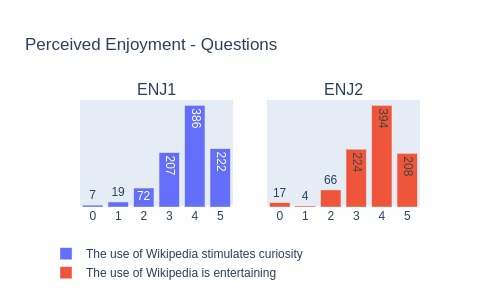

In [21]:
# let's see this distribuition with other features
feats = [i for i in wiki_df.columns if (i.startswith('ENJ') and i != 'USERWIKI')]
title = describe_c[feats[0]][0] + ' - Questions'

plt_question_group(feats, 2, title, True)

### 3.3.1 ENJ1 - The use of Wikipedia stimulates curiosity

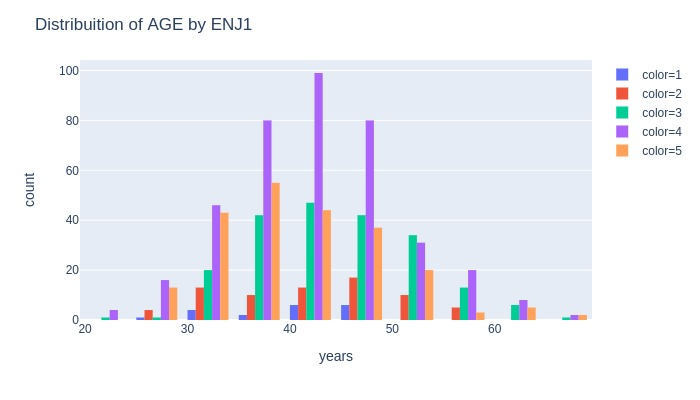

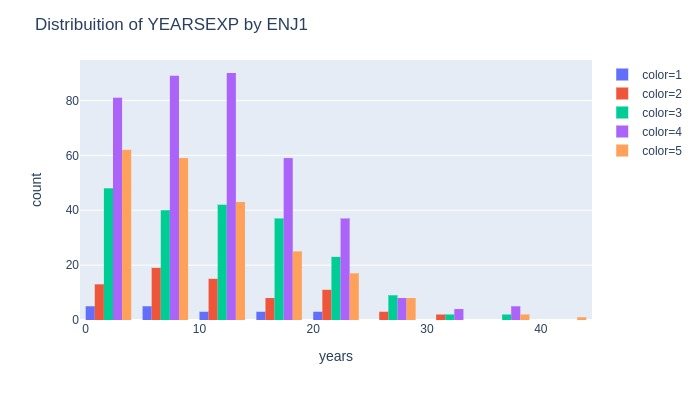

In [22]:
# plot the graphs with ENJ1
an_field = 'ENJ1'
wiki_enj = wiki_df.groupby(an_field)
years_histo_by_f(an_field)

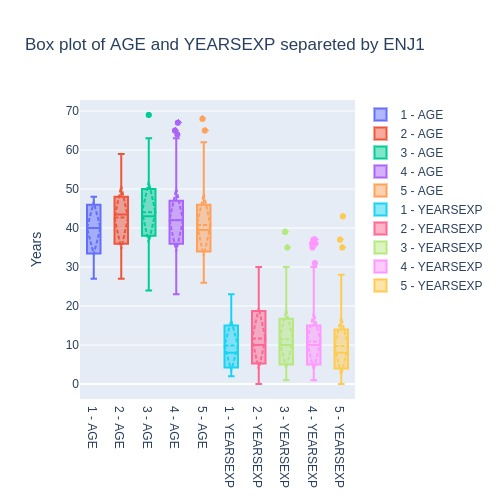

In [23]:
years_box_by_f(an_field)

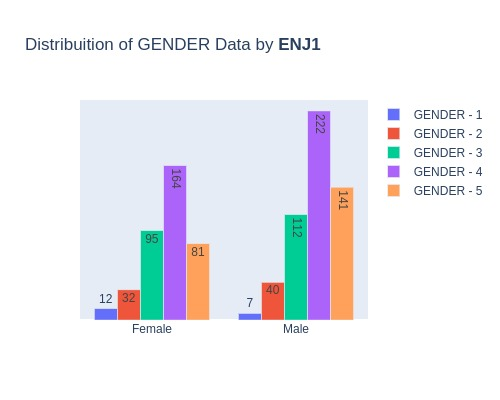

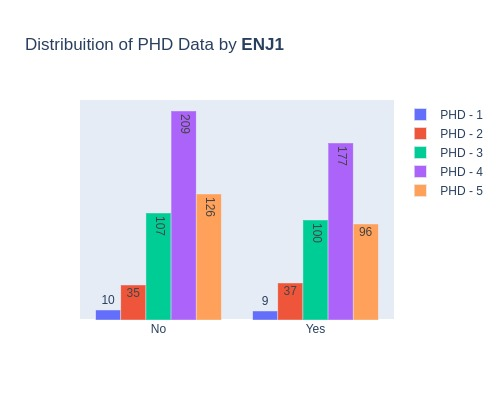

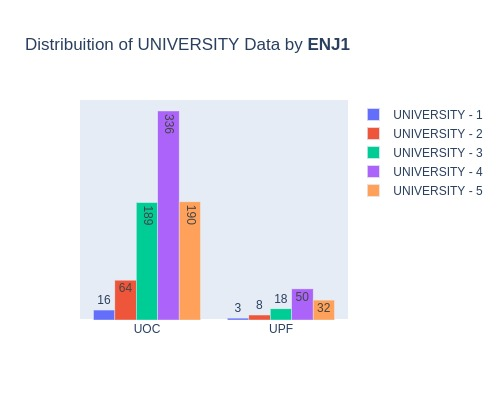

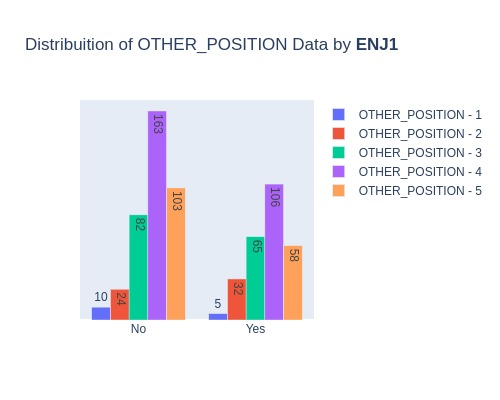

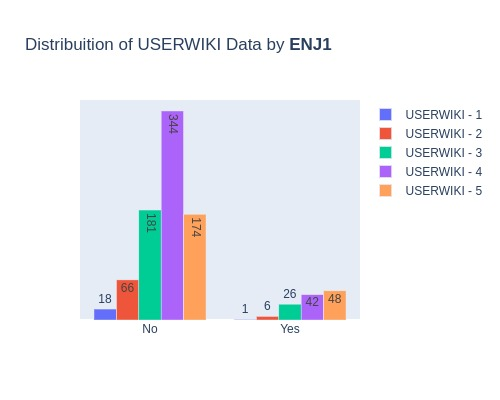

In [24]:
cat1_by_f(an_field)

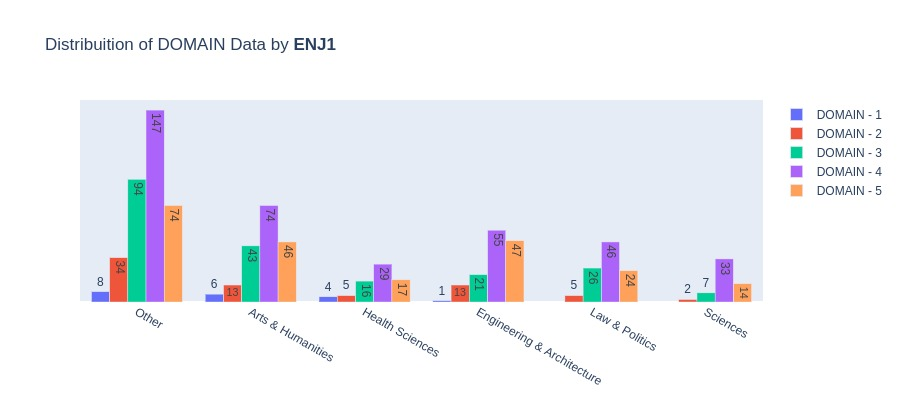

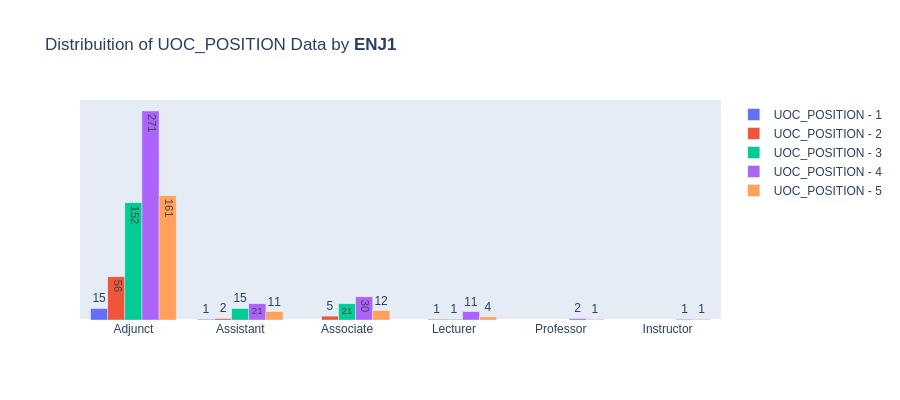

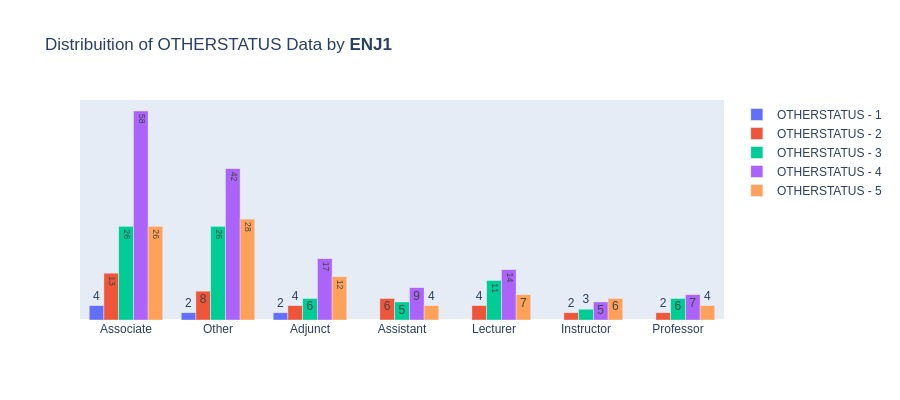

In [25]:
cat2_by_f(an_field)

### 3.3.2 ENJ2 - The use of Wikipedia is entertaining

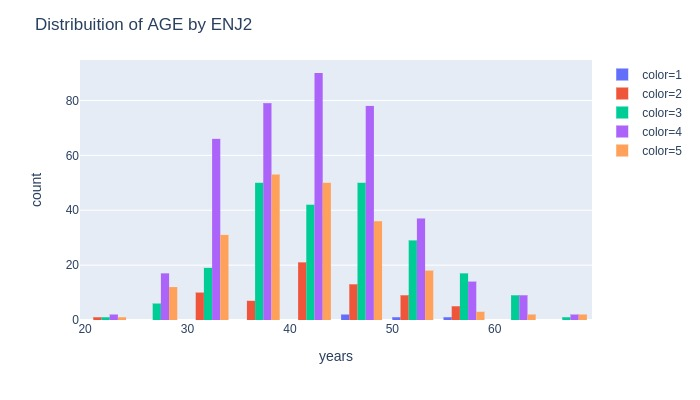

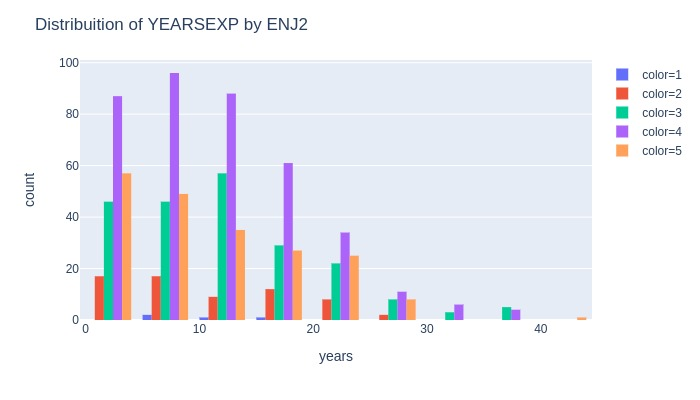

In [26]:
an_field = 'ENJ2'
wiki_enj = wiki_df.groupby(an_field)
years_histo_by_f(an_field)

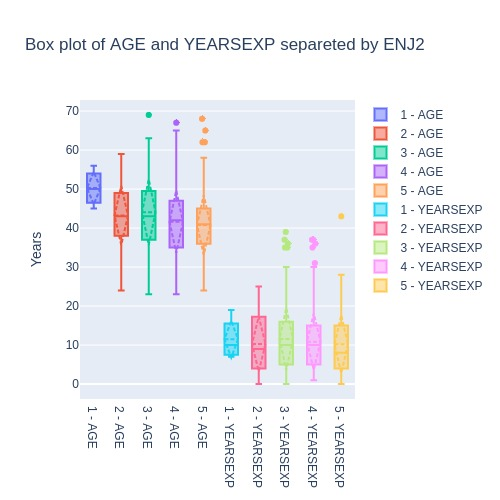

In [27]:
years_box_by_f(an_field)

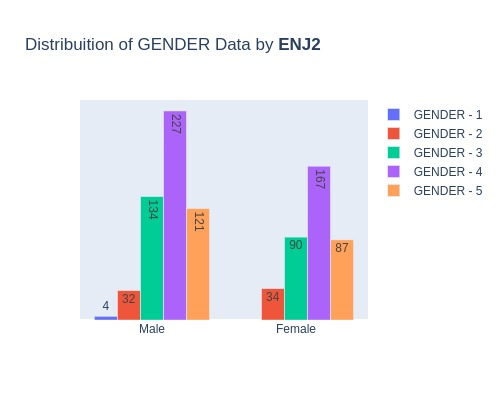

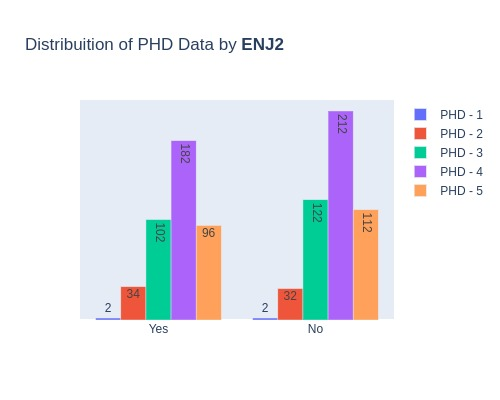

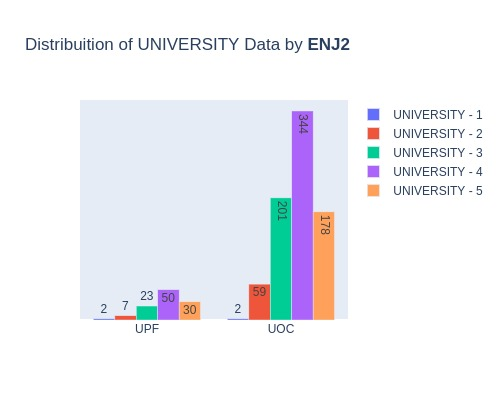

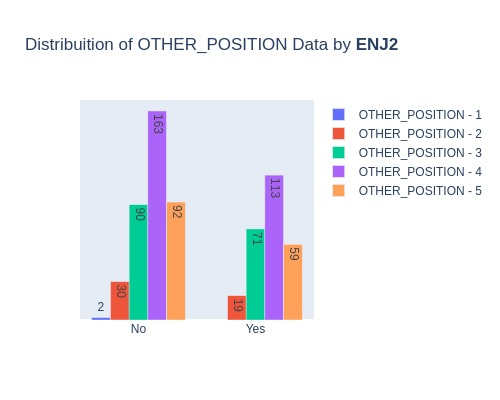

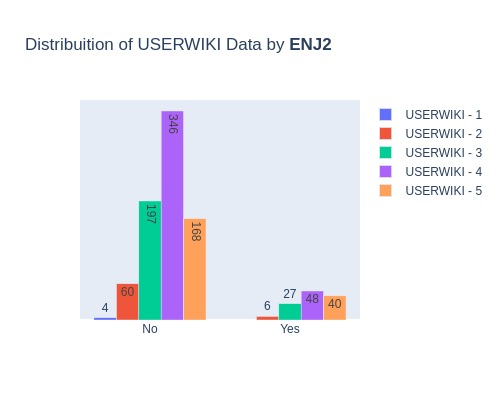

In [28]:
cat1_by_f(an_field)

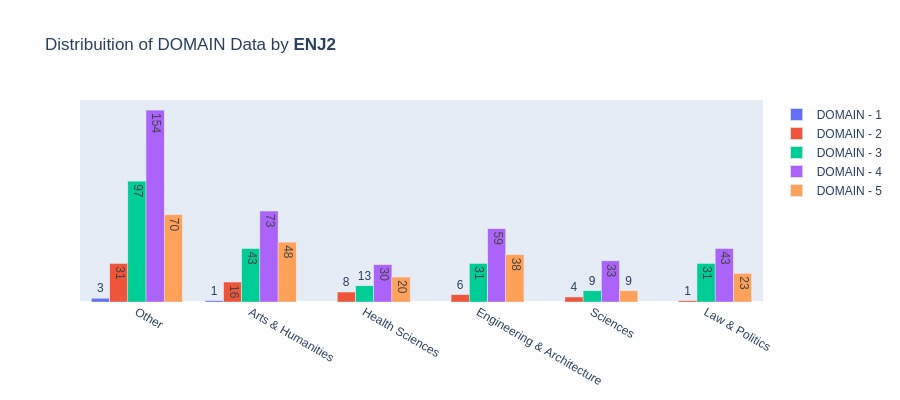

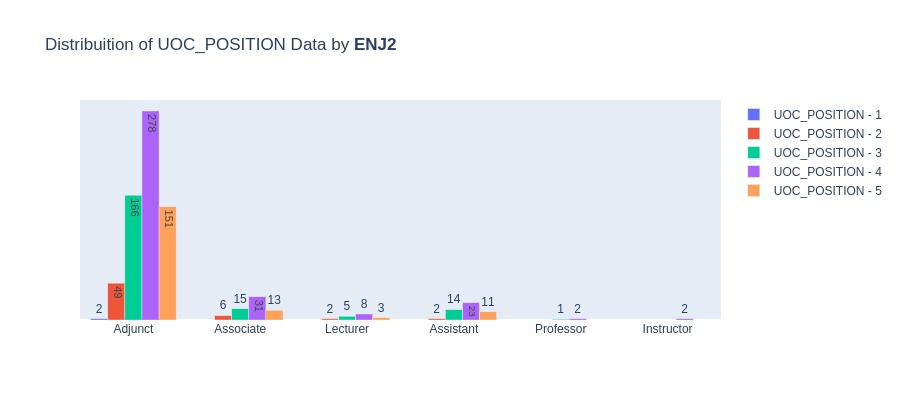

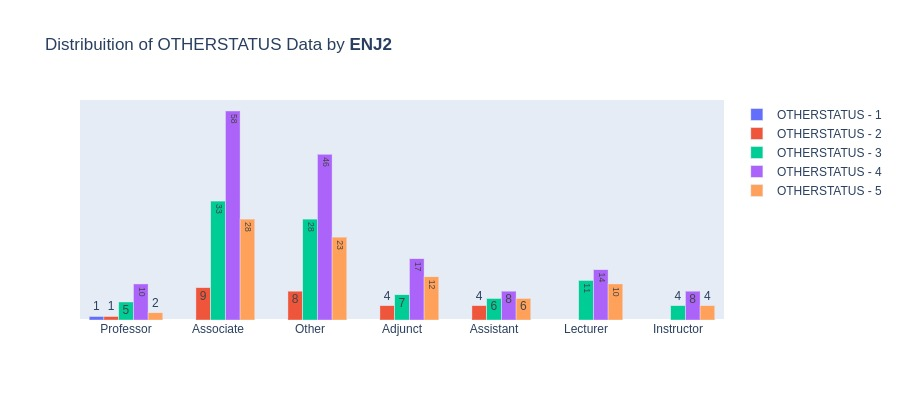

In [29]:
cat2_by_f(an_field)

In [30]:
print(wiki_df['ENJ1'].median(), wiki_df['ENJ1'].mean(),
      wiki_df['ENJ2'].median(), wiki_df['ENJ2'].mean()
     )

4.0 3.7656078860898137 4.0 3.750273822562979


# 4 Correlation features

In [31]:
# a temp column to fix heatmap
wiki_df['heat'] = [0]*len(wiki_df)
temp_c = list(wiki_df.columns[:53])
temp_c.append('heat')

# calculate the correlation
corr = wiki_df[temp_c].corr(method='pearson')
corr['heat']['heat'] = -1

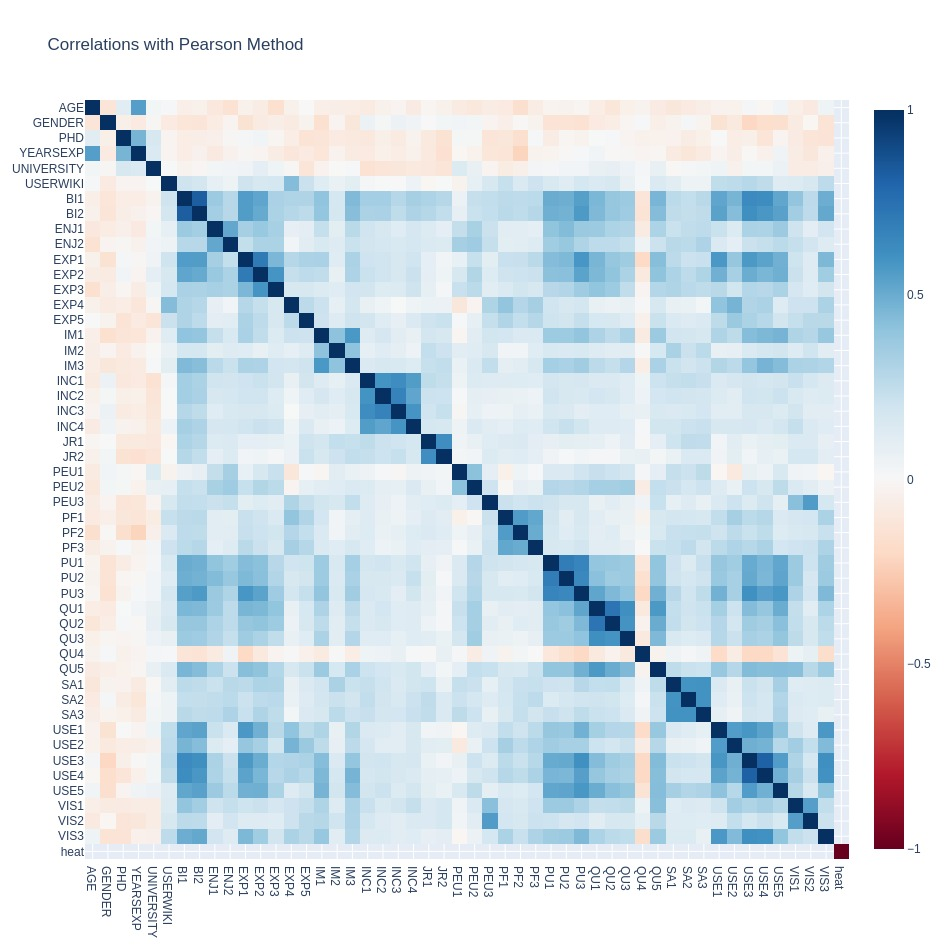

In [32]:
# Print the heatmap of this correlation
data = [go.Heatmap(x=corr.columns,
                   y=corr.index,
                   z=corr, colorscale='RdBu')]
layout = go.Layout(title='Correlations with Pearson Method',
                   yaxis={'autorange':"reversed"})

fig = go.Figure(data=data,layout=layout)
fig.update_layout(autosize=False, height=950, width=950)

# to be viewed on github
Image(fig.to_image(format="jpeg"))

# to normal plot
#fig.show()

**QU4** as I suspected is a negative question, so it's possible to see a negative correlation. The group of questions has the tendency to have a high positive correlation.

## 4.1 Extracting the elements with the highest and lowest correlation

In [33]:
s = corr.unstack() # unstack the correlaction dataframe
so = s.sort_values(kind="quicksort") # sort values with quicksort

### 4.1.1 The lowest

In [34]:
best_neg_corr = so.dropna()[1:20] # take the first values (negative correlation)
best_neg_corr = best_neg_corr.to_frame().reset_index() # reset index and convert again to frame
best_neg_corr['level_0_desc'] = list(map(get_describe_c, best_neg_corr['level_0'])) # add description
best_neg_corr['level_1_desc'] = list(map(get_describe_c, best_neg_corr['level_1'])) # add description
best_neg_corr[best_neg_corr.index % 2 == 0] # only pair because duplicate values

,level_0,level_1,0,level_0_desc,level_1_desc
0,YEARSEXP,PF2,-0.223395,,I actively participate in social networks
2,USE3,GENDER,-0.207110,I recommend my students to use Wikipedia,
4,QU4,USE3,-0.204379,"In my area of expertise, Wikipedia has a lower...",I recommend my students to use Wikipedia
6,QU4,USE4,-0.203864,"In my area of expertise, Wikipedia has a lower...",I recommend my colleagues to use Wikipedia
8,QU4,PU3,-0.202176,"In my area of expertise, Wikipedia has a lower...",Wikipedia is useful for teaching
10,EXP1,QU4,-0.197924,I consult Wikipedia for issues related to my f...,"In my area of expertise, Wikipedia has a lower..."
12,QU4,USE1,-0.189909,"In my area of expertise, Wikipedia has a lower...",I use Wikipedia to develop my teaching materials
14,QU4,VIS3,-0.175863,"In my area of expertise, Wikipedia has a lower...",I cite Wikipedia in my academic papers
16,GENDER,USE4,-0.172990,,I recommend my colleagues to use Wikipedia
18,AGE,PF2,-0.167527,,I actively participate in social networks


### 4.1.2 The highest

In [35]:
 # take the last values (the highest correlation), reset index and convert again to frame
best_pos_corr = so.dropna()[-74:-49].to_frame().sort_values([0], ascending=False).reset_index()
best_pos_corr['level_0_desc'] = list(map(get_describe_c, best_pos_corr['level_0'])) # add description
best_pos_corr['level_1_desc'] = list(map(get_describe_c, best_pos_corr['level_1'])) # add description
best_pos_corr[best_pos_corr.index % 2 == 0] # only pair because duplicate values

,level_0,level_1,0,level_0_desc,level_1_desc
0,BI2,BI1,0.831291,In the future I will use Wikipedia in my teach...,In the future I will recommend the use of Wiki...
2,USE3,USE4,0.819540,I recommend my students to use Wikipedia,I recommend my colleagues to use Wikipedia
4,QU2,QU1,0.736590,Articles in Wikipedia are updated,Articles in Wikipedia are reliable
6,EXP1,EXP2,0.711683,I consult Wikipedia for issues related to my f...,I consult Wikipedia for other academic related...
8,PU2,PU1,0.697394,The use of Wikipedia improves students learning,The use of Wikipedia makes it easier for stude...
10,INC3,INC2,0.676161,To design educational activ. using Wiki: getti...,To design educational activ. using Wiki: getti...
12,PU3,PU1,0.665132,Wikipedia is useful for teaching,The use of Wikipedia makes it easier for stude...
14,PU2,PU3,0.650502,The use of Wikipedia improves students learning,Wikipedia is useful for teaching
16,BI1,USE3,0.638909,In the future I will recommend the use of Wiki...,I recommend my students to use Wikipedia
18,USE4,BI1,0.626512,I recommend my colleagues to use Wikipedia,In the future I will recommend the use of Wiki...


## 4.2 Perceived Enjoyment Correlation
Let's verify correlations with Perceived Enjoyment questions

In [36]:
jr1 = so['JR1'].dropna().to_frame().sort_values([0], ascending=False).reset_index()
jr1 = jr1.rename(columns={'index':'JR1', 0:'JR1_Corr'})

jr2 = so['JR2'].dropna().to_frame().sort_values([0], ascending=False).reset_index()
jr2 = jr2.rename(columns={'index':'JR2', 0:'JR2_Corr'})

pd.concat([jr1, jr2], axis=1)

,JR1,JR1_Corr,JR2,JR2_Corr
0,JR1,1.000000,JR2,1.000000
1,JR2,0.620159,JR1,0.620159
2,BI1,0.312796,BI1,0.287571
3,BI2,0.287496,BI2,0.248564
4,INC1,0.257831,IM3,0.246871
5,SA2,0.253245,INC1,0.238266
6,SA3,0.249500,INC3,0.231759
7,IM2,0.245005,EXP5,0.220916
8,IM3,0.232917,INC2,0.211550
9,INC2,0.215991,IM2,0.210467


# 5. Let's find some clusters!

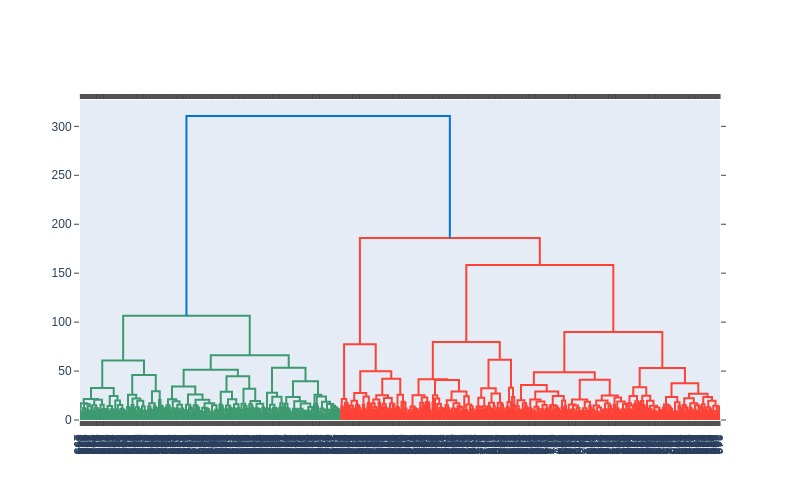

In [37]:
# let's print a dendogram of our data
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

# list of features
num_feat = list(wiki_df.columns[: 53]) #53

# create dendogram with custom linkagefun
fig = ff.create_dendrogram(
    wiki_df[num_feat].dropna(), orientation='bottom',
    linkagefun=lambda x: shc.linkage(wiki_df[num_feat].fillna(0), 'ward', metric='euclidean'), 
    color_threshold=200
)
fig.update_layout(width=800, height=500)
# fig.show()
Image(fig.to_image('jpg'))

In [38]:
# calculate the clusters with euclidean distance
clusters = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
# fit the cluster
cl = clusters.fit_predict(wiki_df[num_feat].fillna(0))
# add the cluster in dataframe
wiki_df['cluster'] = cl

In [39]:
wiki_df[wiki_df['cluster'] == 0]

,AGE,GENDER,DOMAIN,PHD,YEARSEXP,UNIVERSITY,UOC_POSITION,OTHER_POSITION,OTHERSTATUS,USERWIKI,...,G_BI_MEAN,G_BI_STD,G_INC_MEAN,G_INC_STD,G_EXP_MEAN,G_EXP_STD,TOTAL_RATE_MEAN,TOTAL_RATE_STD,heat,cluster
0,40,0,2,True,14.0,1,2,NaN,NaN,False,...,2.5,0.707107,5.00,0.000000,3.0,1.414214,3.093023,1.305920,0,0
1,42,0,5,True,18.0,1,2,NaN,NaN,False,...,2.0,0.000000,3.75,0.500000,2.8,1.095445,2.697674,1.124084,0,0
2,37,0,4,True,13.0,1,3,NaN,NaN,False,...,1.0,0.000000,4.50,1.000000,2.0,0.707107,2.651163,1.212705,0,0
3,40,0,4,False,13.0,1,3,NaN,NaN,False,...,3.0,0.000000,3.50,0.577350,3.6,0.547723,3.441860,0.733625,0,0
4,51,0,6,False,8.0,1,3,NaN,NaN,True,...,5.0,0.000000,4.50,0.577350,4.6,0.547723,4.186047,0.852331,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,43,0,5,True,21.0,2,NaN,NaN,2,False,...,2.0,0.000000,2.00,0.000000,0.0,0.000000,2.302326,1.504515,0,0
909,53,0,6,False,25.0,2,NaN,NaN,6,False,...,4.0,0.000000,3.50,0.577350,2.8,1.643168,3.139535,1.186861,0,0
910,39,0,5,True,9.0,2,NaN,NaN,4,False,...,2.0,0.000000,3.00,2.160247,4.0,1.732051,2.976744,1.503779,0,0
911,40,0,3,True,10.0,2,NaN,NaN,2,False,...,5.0,0.000000,2.50,1.732051,2.4,1.516575,3.372093,1.496397,0,0


In [40]:
from sklearn.decomposition import PCA as skPCA

# create two components PCA
s_pca = skPCA(n_components=2)
pca_components = s_pca.fit_transform(wiki_df[num_feat].fillna(0))
c_pca1 = pca_components[:,0]
c_pca2 = pca_components[:,1]
# add the componets to dataframe
wiki_df['pca1'] = c_pca1
wiki_df['pca2'] = c_pca2
wiki_df.head(2)

,AGE,GENDER,DOMAIN,PHD,YEARSEXP,UNIVERSITY,UOC_POSITION,OTHER_POSITION,OTHERSTATUS,USERWIKI,...,G_INC_MEAN,G_INC_STD,G_EXP_MEAN,G_EXP_STD,TOTAL_RATE_MEAN,TOTAL_RATE_STD,heat,cluster,pca1,pca2
0,40,0,2,True,14.0,1,2,NaN,NaN,False,...,5.00,0.0,3.0,1.414214,3.093023,1.305920,0,0,0.742170,-4.219592
1,42,0,5,True,18.0,1,2,NaN,NaN,False,...,3.75,0.5,2.8,1.095445,2.697674,1.124084,0,0,5.001065,-5.858155


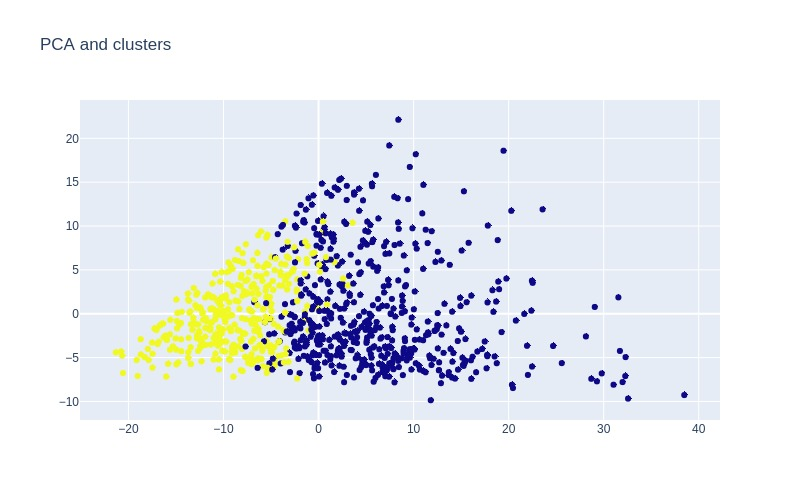

In [41]:
# Plot PCA with the previously groups
trace = go.Scatter(x=wiki_df['pca1'],
                   y=wiki_df['pca2'],
                   mode='markers',
                   #text=wiki_df['Name'],
                   #colorscale=["red", "green", "blue"]
                   marker=dict(color=wiki_df['cluster']))

fig = go.Figure(data=[trace])
fig.update_layout(title='PCA and clusters',width=800, height=500)
#fig.show()
Image(fig.to_image('jpg'))

If we plot the graph with the PCA components and vary the color according to the features this clusters doesn't make sense

# 6 Machine Learning Time

We will try to create a model to predict if the faculty member will recommend to their students to use Wikipedia using with label the feature **USE3** but first we will transform into a boolean variable, considering the liker rate 1,2 and 3 with 0, that is, doesn't recommend and 4, 5 like 1.

After this will try many type of models with

In [42]:
recommend = [int(i/i) if i in [4, 5] else 0 for i in wiki_df['USE3']]
wiki_df['recommend'] = recommend

In [43]:
len(wiki_df[wiki_df['recommend'] == 1]), len(wiki_df[wiki_df['recommend'] == 0])

(246, 667)

In [44]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score # Cross validation function
from sklearn.metrics import confusion_matrix, roc_curve, auc # To generate n confusion matrix and other metrics
from sklearn.naive_bayes import GaussianNB # Naive Bayes with Gaussian
from sklearn.neighbors import KNeighborsClassifier # KNN model
from sklearn.svm import SVC # SVM categorical
from sklearn.gaussian_process import GaussianProcessClassifier # Gaussian process classification based on Laplace approximation
from sklearn.gaussian_process.kernels import RBF, Matern # Parameter of GPC
from sklearn.tree import DecisionTreeClassifier # Decision Tree to Classifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier # Random Forest and Adaboost

# features used in models (USE3 removed)
x_features = ['AGE', 'GENDER', 'DOMAIN', 'PHD', 'YEARSEXP', 'UNIVERSITY',
              'UOC_POSITION', 'OTHER_POSITION', 'OTHERSTATUS', 'USERWIKI',
              'BI1', 'BI2', 'ENJ1', 'ENJ2', 'EXP1', 'EXP2', 'EXP3', 'EXP4', 'EXP5',
              'IM1', 'IM2', 'IM3', 'INC1', 'INC2', 'INC3', 'INC4', 'JR1', 'JR2',
              'PEU1', 'PEU2', 'PEU3', 'PF1', 'PF2', 'PF3', 'PU1', 'PU2', 'PU3', 'QU1',
              'QU2', 'QU3', 'QU4', 'QU5', 'SA1', 'SA2', 'SA3', 'USE1', 'USE2',
              'USE4', 'USE5', 'VIS1', 'VIS2', 'VIS3']

# feature target
y_fetures = ['recommend']

# separete dataset and targer
dataset = wiki_df.fillna(0)[x_features]
target = wiki_df.fillna(0)[y_fetures].values.ravel()

# separete train and test
x_train, x_test, y_train, y_test = train_test_split(
    dataset, target,
    stratify = target,
    test_size=0.33,
    random_state=42)

# list of hyper-parameters to gridsearch
params_grid_pipeline = {
    'GaussianNB' : {
        'var_smoothing': [1e-9, 1e-4, 1e-2, 1e-1, 1, 10]
    },
    
    'RandomForestClassifier' : {
        'max_depth' : [5, 10, 20],
        'n_estimators' : [5, 10, 100, 300],
        'criterion' : ['gini', 'entropy']
    },
    'KNeighborsClassifier' : {
        'n_neighbors' : [3, 5, 6, 10]
    },
    'SVC' : {
        'C' : [0.5, 1.0, 1.5],
        'kernel' : ['poly', 'sigmoid', 'linear'],
        'gamma' : ['auto', 0.1, 1],
        'coef0' : [0.0, 0.01, 1],
        'tol' : [1e-5, 1e-1, 1],
        'probability' : [True]
    },
    'GaussianProcessClassifier' : {
        'kernel' : [1.0*RBF(1.0), 1.0*Matern(1.0)]
    },
    'AdaBoostClassifier' : {
        'n_estimators' : [25, 30, 40, 50, 70],
        'learning_rate' : [0.09, 0.1, 0.5, 1.]
    },
    'DecisionTreeClassifier' : {
        'criterion':['gini','entropy'],
        'splitter' :['best','random'],
        'max_depth' :[1, 2, 3, 5, 8, 15],
        'min_samples_split' :[0.1, 0.2, 0.3, 0.5, 2]
    },
    'RandomForestClassifier' : {
        'n_estimators': [3, 5, 10, 20, 30],
        'max_depth' :[2, 3, 8, 15, 20],
        'min_samples_split' :[0.1, 0.2, 0.3, 0.5, 2],
        'max_features' : ['auto', 1, 4, 8]
    }
}


# list of models
models = [['Naive Bayes', 'GaussianNB', GaussianNB()],
          ['Nearest Neighbors', 'KNeighborsClassifier', KNeighborsClassifier()], 
          ['SVM', 'SVC', SVC()],
          ['Gaussian Process', 'GaussianProcessClassifier', GaussianProcessClassifier()],
          ['AdaBoost', 'AdaBoostClassifier', AdaBoostClassifier()],
          ['Decision Tree', 'DecisionTreeClassifier', DecisionTreeClassifier()],          
          ['Random Forest', 'RandomForestClassifier', RandomForestClassifier()]
         ]

In [45]:
# dictionary to save best estimators
best_models = {}
for model_name, model_id, model in models:
    np.random.seed = 42 # random seed
    
    # create a grid search
    grid_search = GridSearchCV(model, 
                           param_grid=params_grid_pipeline[model_id], 
                           cv=StratifiedKFold(n_splits=5, random_state=42), 
                           n_jobs=-1, iid=False)
    # fit the grid search
    grid_search.fit(x_train, y_train)
    
    # print some stats
    print('---------------------------------------')
    print('Model name: {}'.format(model_name))
    print('Best score: {}'.format(grid_search.best_score_))
    print(grid_search.best_params_)    
    print('---------------------------------------')
    best_models[model_id] = {}
    best_models[model_id]['model'] = grid_search.best_estimator_
    best_models[model_id]['score'] = grid_search.best_score_

---------------------------------------
Model name: Naive Bayes
Best score: 0.8461948553911769
{'var_smoothing': 1e-09}
---------------------------------------
---------------------------------------
Model name: Nearest Neighbors
Best score: 0.8019992003198719
{'n_neighbors': 5}
---------------------------------------
---------------------------------------
Model name: SVM
Best score: 0.8870851659336265
{'C': 0.5, 'coef0': 0.0, 'gamma': 'auto', 'kernel': 'linear', 'probability': True, 'tol': 0.1}
---------------------------------------
---------------------------------------
Model name: Gaussian Process
Best score: 0.888764494202319
{'kernel': 1**2 * Matern(length_scale=1, nu=1.5)}
---------------------------------------
---------------------------------------
Model name: AdaBoost
Best score: 0.8952685592429696
{'learning_rate': 0.09, 'n_estimators': 25}
---------------------------------------
---------------------------------------
Model name: Decision Tree
Best score: 0.9001865920298

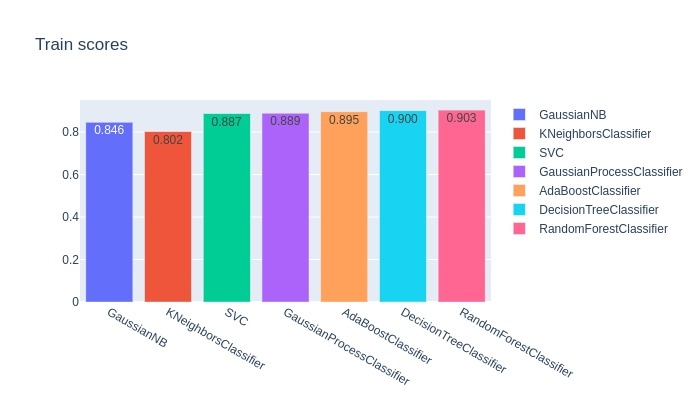

In [46]:
scores = []
names = []
for m in best_models:
    scores.append(best_models[m]['score'])
    names.append(m)
    
fig = go.Figure()
for enu, (n, s) in enumerate(zip(names, scores)):
    bar = go.Bar(x=[n], 
                 y=[s],
                 name=n,
                 text=['{:.3f}'.format(s)],
                 textposition='auto'
                )
    fig.add_trace(bar)

fig.update_layout(title='Train scores', height=400)
#fig.show()
display(Image(fig.to_image('jpg')))

In [47]:
feature_importances_rf = best_models['RandomForestClassifier']['model'].feature_importances_
feature_importances_ada = best_models['AdaBoostClassifier']['model'].feature_importances_

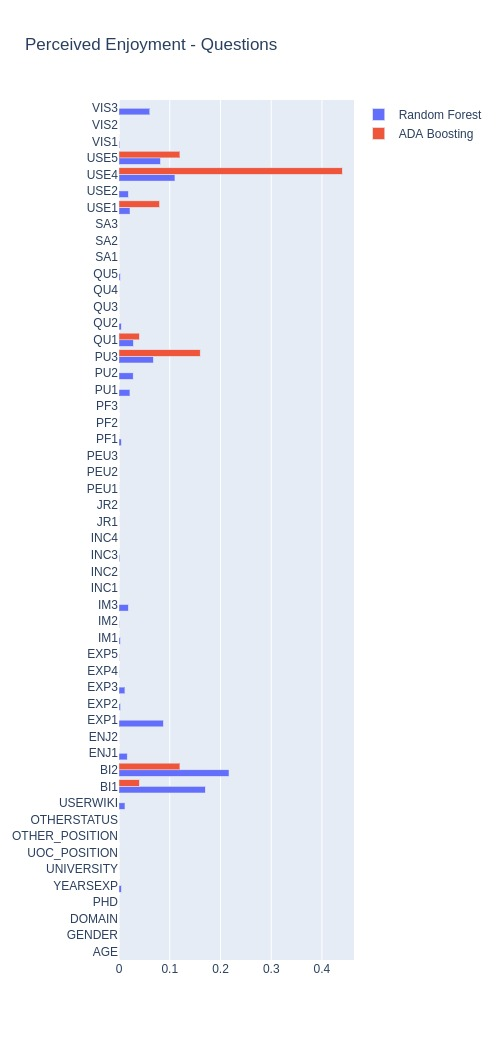

In [48]:
# create a plot
fig = go.Figure()      

# create a bar
trace1 = go.Bar(x=feature_importances_rf,
                  y=dataset.columns,
                  name = 'Random Forest',
                  #text=list(map(get_describe_c, dataset.columns)),
                  orientation='h')
trace2 = go.Bar(x=feature_importances_ada,
                  y=dataset.columns,
                  name = 'ADA Boosting',
                  #text= list(map(get_describe_c, dataset.columns)),
                  orientation='h')
fig.add_trace(trace1)
fig.add_trace(trace2)

# update size and stack mode
fig.update_layout(title=title, height=20*len(dataset.columns), width=500)

# to be viewed on github
display(Image(fig.to_image("jpg")))
# to normal plot
#fig.show() 

In [49]:
def plot_roc_curve(y_true, y_proba): 
    """Plota a curva ROC"""
    fpr, tpr, _ = roc_curve(y_true, y_proba[:, 1])
    auroc = auc(fpr, tpr) 
    
    plt.plot(fpr, tpr, color='orange', label=f'AUROC: {np.round(auroc, 3)}')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

---------------------------------------
GaussianNB


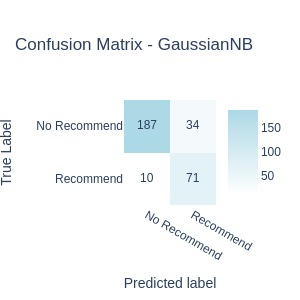

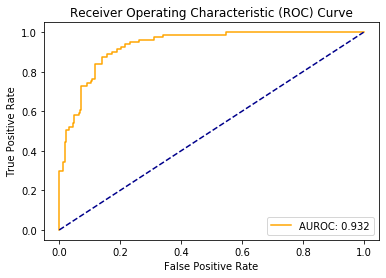

----------------------------------------------------------------------------
---------------------------------------
KNeighborsClassifier


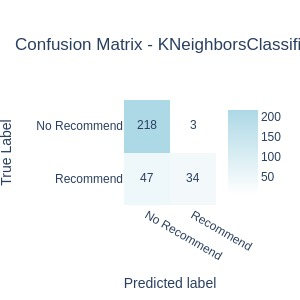

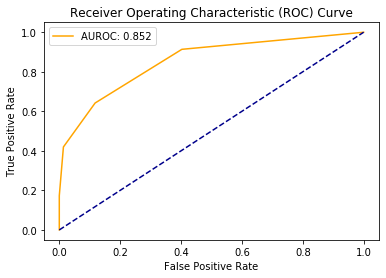

----------------------------------------------------------------------------
---------------------------------------
SVC


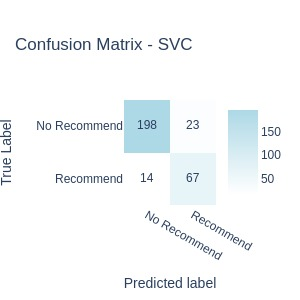

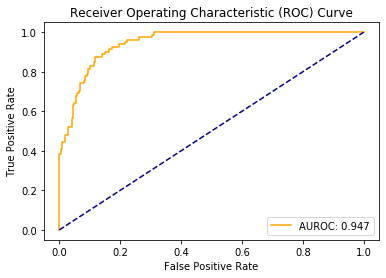

----------------------------------------------------------------------------
---------------------------------------
GaussianProcessClassifier


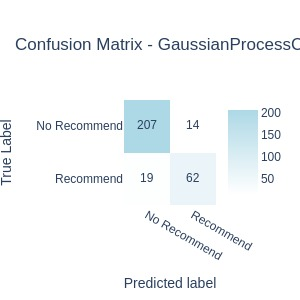

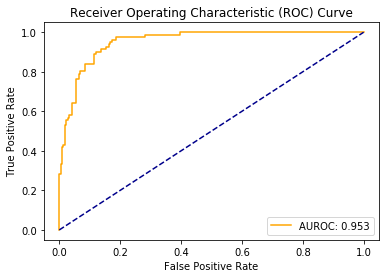

----------------------------------------------------------------------------
---------------------------------------
AdaBoostClassifier


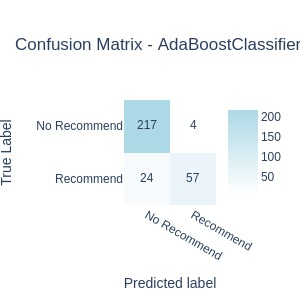

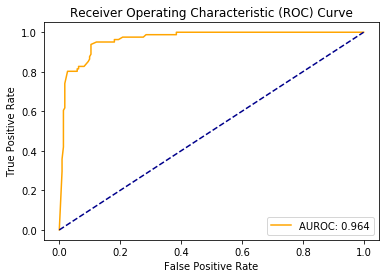

----------------------------------------------------------------------------
---------------------------------------
DecisionTreeClassifier


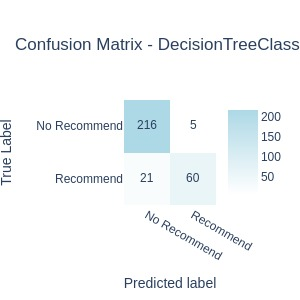

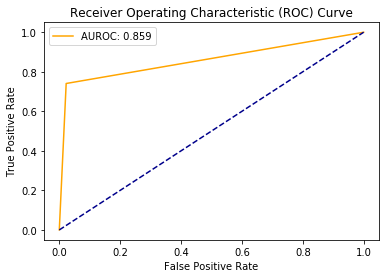

----------------------------------------------------------------------------
---------------------------------------
RandomForestClassifier


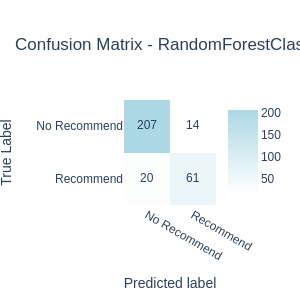

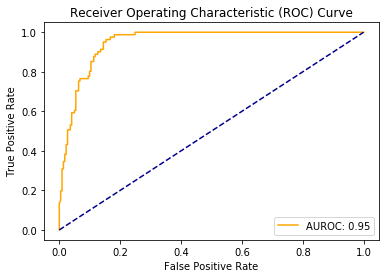

----------------------------------------------------------------------------


In [53]:
for i in best_models:
    print('---------------------------------------')
    print(i)
    pred_prob = best_models[i]['model'].predict_proba(x_test)
    pred_class = best_models[i]['model'].predict(x_test)
    
    # Confusion Matrix
    z = confusion_matrix(y_test, pred_class)
    x=['No Recommend', 'Recommend']
    y=['No Recommend', 'Recommend']
       
    # Generate annotations to graph
    annotations = []
    for n, row in enumerate(z):
        for m, val in enumerate(row):
            annotations.append(go.layout.Annotation(text=str(z[n][m]), x=x[m], y=y[n],
                                             xref='x1', yref='y1', showarrow=False))
            
    data = [go.Heatmap(x=x,y=y,z=z,                   
                   colorscale=["white", "lightblue"])] #amp blues peach

    layout = go.Layout(title='Confusion Matrix - {}'.format(i), 
                       xaxis={'title' : 'Predicted label'},
                       yaxis={'autorange' : 'reversed', 
                              'title' : 'True Label'})
    
    fig = go.Figure(data=data, layout=layout)
    fig['layout'].update(annotations=annotations, height=300, width=300)

    # fig.show()
    display(Image(fig.to_image('jpg')))
    plot_roc_curve(y_test, pred_prob)
    
    print('----------------------------------------------------------------------------')

Adaboost won like the best model with the better accuracy and the bigger AUROC

In [59]:
(217+57)/302

0.9072847682119205

In [60]:
(207+61)/302

0.8874172185430463